# Research data supporting "A coming of age for reference many-body methods: Achieving consensus between theory and experiments for CO on MgO"

This notebook accompanies our paper: **A coming of age for reference many-body methods in surface chemistry: Achieving consensus between theory and experiments for CO on MgO**. It can be found on GitHub at https://github.com/benshi97/Data_Embedded_Cluster_Protocol and explored interactively on [Colab](https://colab.research.google.com/github/benshi97/Data_CO_on_MgO/blob/main/analyse.ipynb).

### Abstract

Determining the molecule-surface adsorption energy *E*<sub>ads</sub> from first-principles is pivotal to predict technologically-relevant phenomena such as reaction rates in catalysis. Here, the prototypical molecule-surface system to validate first-principles methods has long been CO on MgO. However, to date, there is no consensus on its *E*<sub>ads</sub>, with theory and experiments yielding a wide range of values. In this work, we tackle this problem by leveraging the latest advances in diffusion Monte Carlo (DMC) and coupled cluster theory \[CCSD(T)\] to obtain accurate predictions of the CO on MgO *E*<sub>ads</sub>. With this effort, we are able to close the chapter on this long-debated problem, reaching agreement in the *E*<sub>ads</sub> between DMC, CCSD(T) and experiment. Now, this consensus between theory and experiment sets the stage for their combined integration in future work to reveal detailed insights into important catalytic processes for a range of surfaces and molecules.

## Contents
* [Table S1 and Figure 1 - Past CO on MgO *E*<sub>ads</sub> and Current Work](#tables1fig1)
* [Table S2 and S3 - Validating the revPBE-D4 geometry and Computing its $\Delta_\textrm{geom}$](#tables2s3)
* [Table S4 - Periodic CCSD(T) Convergence](#tables4)
* [Table S5 - Periodic DMC Convergence](#tables5)
* [Table S6 - DFT Convergence](#tables6)
* [Table S8 to S10 and Figure 2 - SKZCAM Cluster CCSD(T) Convergence](#tables8-s10)
* [Table S7 - Final periodic CCSD(T), periodic DMC and cluster CCSD(T) $E_\textrm{ads}$ and their individual contributions](#tables7)
* [Table S11 - Analysis of previous computational work on CO on MgO](#tables11)
* [Table S12 - Computation of zero-point energy and thermal contribution terms to convert $H_\textrm{ads}$ to $E_\textrm{ads}$](#tables12)
* [Figure 3 and S1 - Converting previous experiment $H_\textrm{ads}$ or $E_\textrm{act}$ (for TPD) to $E_\textrm{ads}$](#fig3)
<!-- * [Table S8 - Bulk limit E<sub>Ov</sub> values from periodic supercell approach](#tables8)
* [Figure 1 - Schematic graph comparing RDF and Inconsistent approaches](#figure1)
* [Figure 2 - RDF versus Stoichiometric quantum clusters](#figure2)
* [Figure 3 and Table S8 - E<sub>Ov</sub> change with RDF cluster size for all 4 systems](#figure3)
* [Figure 4 - Change in E<sub>Ov</sub> with quantum cluster size for different levels of theory](#figure4)
* [Table S5 - Basis set and frozen core correction for cWFT calculations including double hybrid B2PLYP](#tables5)
* [Figure 5, Table 1 and Table S12 - Final DFT and cWFT E<sub>Ov</sub> values and DFT XC functional errors](#figure5)
* [Table S2 - XC dependence of the Ov relaxation energy in rutile TiO<sub>2</sub>](#tables2)
* [Table S3 - E<sub>Ov</sub> dependence on ECP and PC region lengths](#tables3)
* [Table S4 - E<sub>Ov</sub> dependence on basis set size for DFT](#tables4)
* [Figure S1 - E<sub>Ov</sub> dependence on basis set size for LNO-CCSD(T) in MgO](#figures1)
* [Figure S2 - E<sub>Ov</sub> dependence on basis set size for LNO-CCSD(T) in TiO<sub>2</sub>](#figures2)
* [Table S6 - XC functional dependence of rutile TiO<sub>2</sub> and rocksalt MgO lattice parameters](#tables6)
* [Figure S3 - Range of E<sub>Ov</sub> for different shapes for a given size of cluster](#figures3)
* [Figure S5 - Finding the bulk TiO<sub>2</sub> smallest converged cluster](#figures5)
* [Table S9 - E<sub>Ov</sub> size convergence at LMP2 level for MgO bulk](#tables9)
* [Table S10 - E<sub>Ov</sub> size convergence at LMP2 and LNO-CCSD(T) level for MgO surface](#tables10)
* [Figure S6 - E<sub>Ov</sub> size convergence at LMP2 level for TiO<sub>2</sub> surface](#figures6)
* [Figure S7 - Odd-even oscillations for E<sub>Ov</sub> in TiO<sub>2</sub> surface](#figures7)
* [Table S11 - LNO threshold convergence in MgO surface](#tables11)
* [Table S13 - Comparison against deltaCCSD(T) approach of Richter et al.](#tables13) -->

In [17]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB == True:
    !rm -rf /content/Data_CO_on_MgO-main /content/main.zip
    !wget https://github.com/benshi97/Data_CO_on_MgO/archive/refs/heads/main.zip
    !unzip /content/main.zip
    ! apt install ase
    !pip install pyblock datetime
    %pwd
    %cd /content/Data_CO_on_MgO-main

In [1]:
from ase import io
from ase.units import mol, kcal, kJ, Hartree
import pandas as pd
from cluster_scripts import *
import pyblock
from jup_plot import *
from datetime import datetime

usetex = plt.rcParams['text.usetex']
print(usetex)
def get_mrcc_walltime(filename):
    orig_time = datetime(1, 1, 1, 0, 0)
    total_time = datetime(1, 1, 1, 0, 0)

    f = open(filename)
    a = f.readlines()
    b1 = datetime.strptime(a[19].split()[1] + '-' + a[19].split()[2],"%Y-%m-%d-%H:%M:%S")
    b2 = datetime.strptime(a[-3].split()[1] + '-' + a[-3].split()[2],"%Y-%m-%d-%H:%M:%S")
    total_time = total_time + (b2-b1)
    f.close()
    return (total_time - orig_time).total_seconds()

ene_final = np.load('methods_eads.npy',allow_pickle='TRUE').item()

best_expt_eads = np.loadtxt('best_expt.txt')
dft_functionals = ['01_PBE-D2-Ne','02_revPBE-D4','03_vdW-DF','04_rev-vdW-DF2','05_PBE0-D4','06_B3LYP-D2-Ne']

kcalmol_to_meV = kcal/mol * 1000
kjmol_to_meV = kJ/mol * 1000
mha_to_meV = Hartree

False


<a id='tables1fig1'></a>
## Table S1 and Figure 1

In [2]:

# Experiments go as [hads, experiment_type,year,details]
experimental_hads = {
    'Furuyama et al.': [-3.8*kcalmol_to_meV,'Isothermal adsorption',1978,''],
    'Paukshtis et al.': [-15*kjmol_to_meV,'IR spectroscopy',1981,''],
    'Henry et al.': [-420,'Auger spectroscopy',1991,''],
    'He et al.': [-9.9*kcalmol_to_meV,'Isothermal adsorption',1992,''],
    'Wichtendahl et al.': [-140,'Thermal programmed desorption',1999,'Eact, nu=13, low 0.3 ML coverage'],
    'Dohnalek et al.': [-18.5*kjmol_to_meV,'Thermal programmed desorption',2001,'Eact, nu=15, low 0.125 ML coverage'],
    'Spoto et al.1': [-11*kjmol_to_meV,'FTIR spectroscopy',2003,'MgO smoke'],
    'Spoto et al.2': [-12.5*kjmol_to_meV,'FTIR spectroscopy',2004,'MgO smoke'],
    'Sterrer et al.': [-15*kjmol_to_meV,'Thermal programmed desorption',2006,'Eact, nu=13, high CO coverage']
}

# Computation goes as [eads,]
computational_eads = {
    'Ugliengo et al.': [-12.7*kjmol_to_meV,'cluster MP2:B3LYP',2002,'HL:LL mechanical embedding'],
    'Herschend et al.': [-124,'cluster MP2',2006,'Electrostatic embedding'],
    'Qin et al.': [-110,'cluster CISD',2008,'Electrostatic embedding'],
    'Staemmler': [-124,'cluster CEPA',2011,'Method of local increments'],
    'Boese et al.': [-21*kjmol_to_meV,'cluster MP2+deltaCC:PBE-D2',2013,'HL:LL mechanical embedding'],
    'Li et al.': [-3*kjmol_to_meV,'cluster MP2',2015,'Gas phase cluster-in-molecule approach'],
    'Bajdich et al.': [-310,'periodic RPA',2015,'Supercell approach'],
    'Heuser et al.': [ -15.0*mha_to_meV, 'cluster CC2',2016,'Wave-function frozen-density embedding'],
    'Mazheika and Levchenko1': [70,'cluster CCSD(T)',2016,'Electrostatic embedding'],
    'Mazheika and Levchenko2': [-10,'cluster RPA',2016,'Electrostatic embedding, RPA+rSE+SOSEX'],
    # 'Alessio et al.1': [-21.7*kjmol_to_meV,'cluster MP2+deltaCC:B3LYP-D2',2019,'HL:LL mechanical embedding'],
    'Alessio et al.2': [-22.2*kjmol_to_meV,'periodic LMP2+deltaCC',2019,'Supercell with cluster deltaCC'],
    'Mitra et al.': [-9.18*kcalmol_to_meV,'periodic CCSD',2022,'Supercell approach']
}

thermal_correction = np.genfromtxt('thermal_corr.txt')[0,0]
rt = np.genfromtxt('thermal_corr.txt')[3,0]


In [3]:
df = pd.DataFrame(experimental_hads).T
df = df.reset_index()
df.columns = ['Reference','Hads (meV)','Method','Year','Details']
df['Hads (meV)'] = df['Hads (meV)'].apply(lambda x: round(x))

eads_list = []
for i in experimental_hads:
    if 'desorption' in experimental_hads[i][1]:
        eads_list += [experimental_hads[i][0] - thermal_correction - 0.5*rt]
    else:
        eads_list += [experimental_hads[i][0] - thermal_correction]


df['Eads (meV)'] = eads_list
df['Eads (meV)'] = df['Eads (meV)'].round().astype(int)

# df['Hads (meV)'] - thermal_correction
# df['Details'] = pd.Series(dtype='str')
df = df[['Reference','Eads (meV)','Hads (meV)','Method','Year','Details']]

df1 = pd.DataFrame(computational_eads).T
df1 = df1.reset_index()
df1.columns = ['Reference','Eads (meV)','Method','Year','Details']
df1['Eads (meV)'] = df1['Eads (meV)'].apply(lambda x: round(x))
df1['Hads (meV)'] = df1['Eads (meV)'] + thermal_correction
df1['Hads (meV)'] = df1['Hads (meV)'].apply(lambda x: round(x))

df1 = df1[['Reference','Eads (meV)','Hads (meV)','Method','Year','Details']]
df1

df_final = pd.concat([df,df1])
# df_final.to_clipboard( index=False, excel=True,sep=',')
df_final


,Reference,Eads (meV),Hads (meV),Method,Year,Details
0,Furuyama et al.,-194,-165,Isothermal adsorption,1978,
1,Paukshtis et al.,-185,-155,IR spectroscopy,1981,
2,Henry et al.,-449,-420,Auger spectroscopy,1991,
3,He et al.,-459,-429,Isothermal adsorption,1992,
4,Wichtendahl et al.,-172,-140,Thermal programmed desorption,1999,"Eact, nu=13, low 0.3 ML coverage"
5,Dohnalek et al.,-224,-192,Thermal programmed desorption,2001,"Eact, nu=15, low 0.125 ML coverage"
6,Spoto et al.1,-143,-114,FTIR spectroscopy,2003,MgO smoke
7,Spoto et al.2,-159,-130,FTIR spectroscopy,2004,MgO smoke
8,Sterrer et al.,-187,-155,Thermal programmed desorption,2006,"Eact, nu=13, high CO coverage"
0,Ugliengo et al.,-132,-103,cluster MP2:B3LYP,2002,HL:LL mechanical embedding


/home/shixubenjamin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


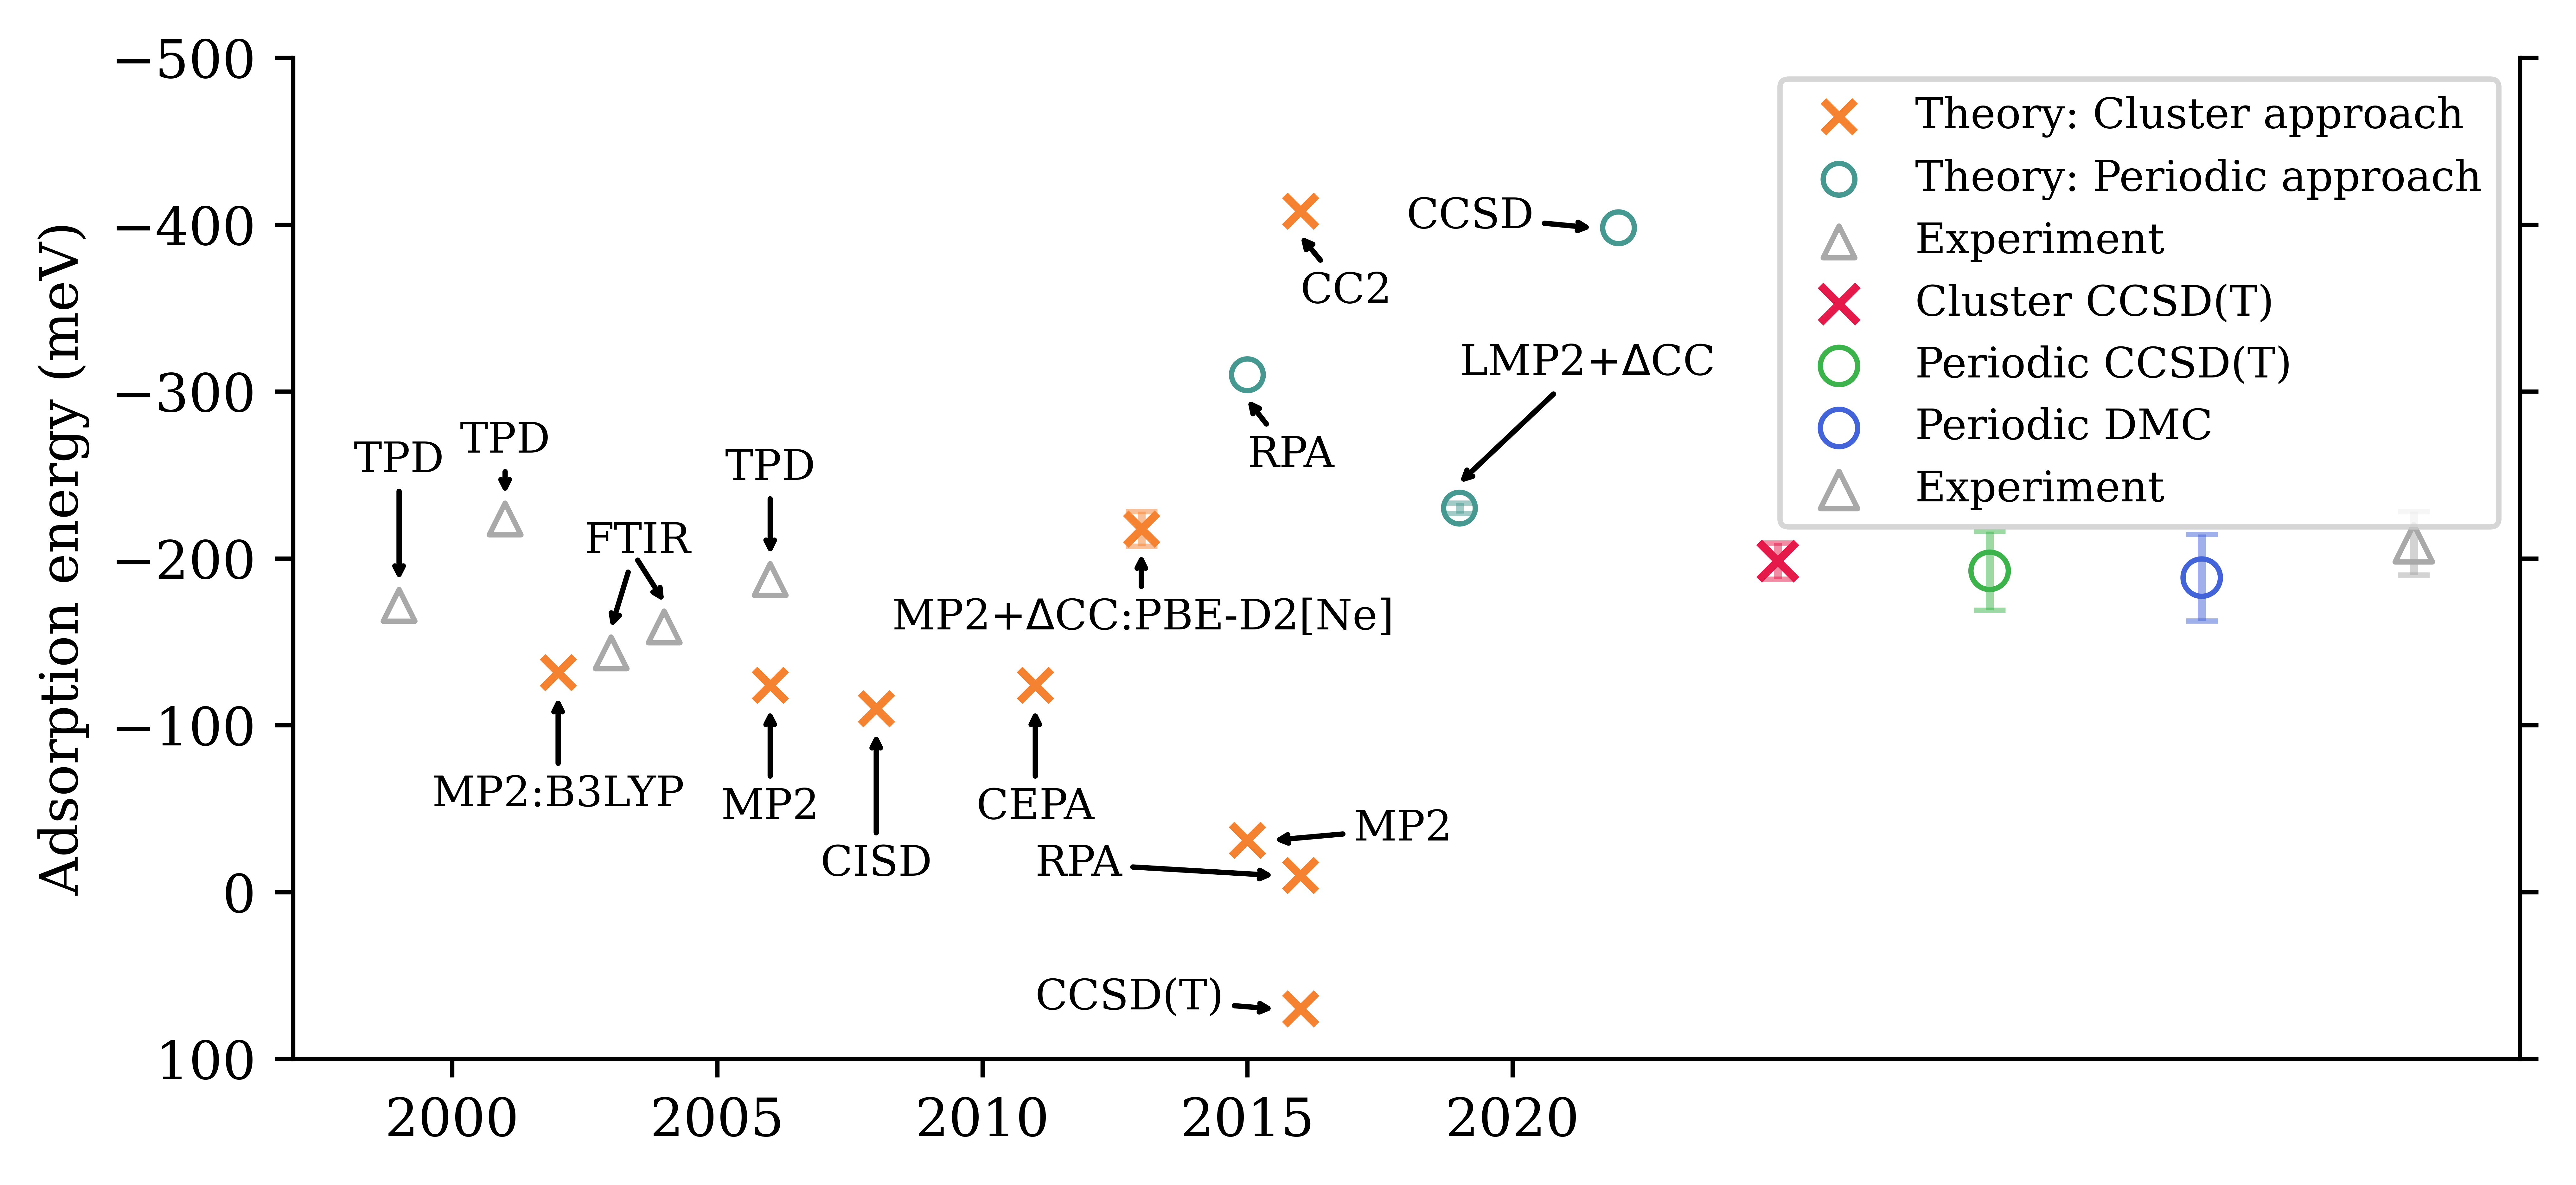

In [9]:
exp_energies = []
exp_time = []
for i in ['Wichtendahl et al.','Dohnalek et al.','Spoto et al.1','Spoto et al.2','Sterrer et al.']:
    if 'desorption' in experimental_hads[i][1]:
        exp_energies += [experimental_hads[i][0] - thermal_correction - 2.5]
    else:
        exp_energies += [experimental_hads[i][0] - thermal_correction]
    exp_time += [experimental_hads[i][2]]



cwft_cluster_time = [computational_eads[x][2] for x in computational_eads if 'cluster' in computational_eads[x][1]]
cwft_cluster_energies = [computational_eads[x][0] for x in computational_eads if 'cluster' in computational_eads[x][1]]

cwft_periodic_time = [computational_eads[x][2] for x in computational_eads if 'periodic' in computational_eads[x][1]]
cwft_periodic_energies = [computational_eads[x][0] for x in computational_eads if 'periodic' in computational_eads[x][1]]



fig, axs = plt.subplots(figsize=(6.66,3),dpi=1200, sharey=True,constrained_layout=True)

prop = dict(arrowstyle="->,head_width=0.1,head_length=0.2",
            shrinkA=0,shrinkB=0)


axs.scatter(cwft_cluster_time,cwft_cluster_energies,marker="x",color=color_dict['orange'],edgecolors='none',label='Theory: Cluster approach')
axs.scatter(cwft_periodic_time,cwft_periodic_energies,marker="o",color=color_dict['teal'],facecolor='none',label='Theory: Periodic approach')
axs.scatter(exp_time,exp_energies,marker="^",color=color_dict['grey'],facecolor='none',label='Experiment')

if usetex == True:
    for index, i in enumerate(exp_time):
        if i == 1999:
            axs.annotate("TPD" + r'\textsuperscript{l}',xy=(1999,exp_energies[index]-15), xytext=(1999,exp_energies[index]-80),arrowprops=prop,ha='center',fontsize=8)    
        if i == 2001:
            axs.annotate("TPD" + r'\textsuperscript{m}',xy=(i,exp_energies[index]-15), xytext=(i,exp_energies[index]-40),arrowprops=prop,ha='center',fontsize=8)   
        if i == 2006:
            axs.annotate("TPD" + r'\textsuperscript{p}',xy=(i,exp_energies[index]-15), xytext=(i,exp_energies[index]-60),arrowprops=prop,ha='center',fontsize=8)
        if i == 2003:
            axs.annotate("FTIR" + r'\textsuperscript{n,o}',xy=(i,exp_energies[index]-15), xytext=(i+0.5,exp_energies[index]-60),arrowprops=prop,ha='center',fontsize=8)
        if i == 2004:
            axs.annotate('',xy=(i,exp_energies[index]-15), xytext=(i-0.5,exp_energies[index]-40),arrowprops=prop,ha='center',fontsize=8)


    for i in ['Ugliengo et al.']:
        axs.annotate("{0}".format(computational_eads[i][1].split()[1]) + r'\textsuperscript{a}',xy=(computational_eads[i][2],computational_eads[i][0]+15), xytext=(computational_eads[i][2],computational_eads[i][0] + 80),arrowprops=prop,ha='center',fontsize=8)

    for i in ['Herschend et al.']:
        axs.annotate("{0}".format(computational_eads[i][1].split()[1]) + r'\textsuperscript{b}',xy=(computational_eads[i][2],computational_eads[i][0]+15), xytext=(computational_eads[i][2],computational_eads[i][0] + 80),arrowprops=prop,ha='center',fontsize=8)

    for i in ['Staemmler']:
        axs.annotate("{0}".format(computational_eads[i][1].split()[1]) + r'\textsuperscript{d}',xy=(computational_eads[i][2],computational_eads[i][0]+15), xytext=(computational_eads[i][2],computational_eads[i][0] + 80),arrowprops=prop,ha='center',fontsize=8)

    for i in ['Qin et al.']:
        axs.annotate("{0}".format(computational_eads[i][1].split()[1]) + r'\textsuperscript{c}',xy=(computational_eads[i][2],computational_eads[i][0]+15), xytext=(computational_eads[i][2],computational_eads[i][0] + 100),arrowprops=prop,ha='center',fontsize=8)

    for i in ['Mitra et al.']:
        axs.annotate("{0}".format(computational_eads[i][1].split()[1])+ r'\textsuperscript{k}',xy=(computational_eads[i][2]-0.5,computational_eads[i][0]), xytext=(computational_eads[i][2]-4,computational_eads[i][0]),arrowprops=prop,ha='left',fontsize=8)

    for i in ['Heuser et al.']:
        axs.annotate("{0}".format(computational_eads[i][1].split()[1]) + r'\textsuperscript{i}',xy=(computational_eads[i][2],computational_eads[i][0]+15), xytext=(computational_eads[i][2],computational_eads[i][0]+55),arrowprops=prop,ha='left',fontsize=8)

    for i in ['Bajdich et al.']:
        axs.annotate("{0}".format(computational_eads[i][1].split()[1]) + r'\textsuperscript{g}',xy=(computational_eads[i][2],computational_eads[i][0]+15), xytext=(computational_eads[i][2],computational_eads[i][0]+55),arrowprops=prop,ha='left',fontsize=8)

    for i in ['Mazheika and Levchenko1']:
        axs.annotate("{0}".format(computational_eads[i][1].split()[1])+ r'\textsuperscript{j}',xy=(computational_eads[i][2]-0.5,computational_eads[i][0]), xytext=(computational_eads[i][2]-5,computational_eads[i][0]),arrowprops=prop,ha='left',fontsize=8)

    for i in ['Mazheika and Levchenko2']:
        axs.annotate("{0}".format(computational_eads[i][1].split()[1])+ r'\textsuperscript{j}',xy=(computational_eads[i][2]-0.5,computational_eads[i][0]), xytext=(computational_eads[i][2]-5,computational_eads[i][0]),arrowprops=prop,ha='left',fontsize=8)

    for i in ['Li et al.']:
        axs.annotate("{0}".format(computational_eads[i][1].split()[1]) +  r'\textsuperscript{h}',xy=(computational_eads[i][2]+0.5,computational_eads[i][0]), xytext=(computational_eads[i][2]+2,computational_eads[i][0]),arrowprops=prop,ha='left',fontsize=8)

    # for i in ['Alessio et al.1']:
    #     axs.annotate(r'MP2+$\Delta$CC:B3LYP-D2[Ne]'  + r'\textsuperscript{f}',xy=(computational_eads[i][2],computational_eads[i][0]), xytext=(computational_eads[i][2],computational_eads[i][0]+65),arrowprops=prop,ha='center',fontsize=8)

    for i in ['Alessio et al.2']:
        axs.annotate(r'LMP2+$\Delta$CC'.format(computational_eads[i][1]) + r'\textsuperscript{f}',xy=(computational_eads[i][2],computational_eads[i][0]-15), xytext=(computational_eads[i][2],computational_eads[i][0]-80),arrowprops=prop,ha='left',fontsize=8)
        axs.errorbar(computational_eads[i][2],computational_eads[i][0],yerr=0.3*kjmol_to_meV,fmt='o',markersize=0,capsize=3,color=color_dict['teal'],markerfacecolor='none',alpha=0.5)

    for i in ['Boese et al.']:
        axs.annotate(r'MP2+$\Delta$CC:PBE-D2[Ne]'  + r'\textsuperscript{e}',xy=(computational_eads[i][2],computational_eads[i][0]+15), xytext=(computational_eads[i][2],computational_eads[i][0]+60),arrowprops=prop,ha='center',fontsize=8)
        axs.errorbar(computational_eads[i][2],computational_eads[i][0],yerr=1.0*kjmol_to_meV,fmt='^',markersize=0,capsize=3,color=color_dict['orange'],markerfacecolor='none',alpha=0.5)


    axs.errorbar(2025,ene_final['Cluster CCSD(T)']['Final'][0],yerr=ene_final['Cluster CCSD(T)']['Final'][1],fmt='x',markersize=0,capsize=3,color=color_dict['red'],markerfacecolor='none',alpha=0.5) #,label='SKZCAM-CCSD(T)')
    axs.errorbar(2029,ene_final['Periodic CCSD(T)']['Final'][0],yerr=ene_final['Periodic CCSD(T)']['Final'][1],fmt='o',markersize=0,capsize=3,color=color_dict['green'],markerfacecolor='none',alpha=0.5) #,label='p-CCSD(T)')
    axs.errorbar(2033,ene_final['Periodic DMC']['Final'][0],yerr=ene_final['Periodic DMC']['Final'][1],fmt='o',markersize=0,capsize=3,color=color_dict['blue'],markerfacecolor='none',alpha=0.5) #,label='p-DMC')
    axs.errorbar(2037,best_expt_eads[0],yerr=best_expt_eads[1],fmt='^',markersize=0,capsize=3,color=color_dict['grey'],markerfacecolor='none',alpha=0.5) #,label='p-DMC')


    axs.scatter(2025,ene_final['Cluster CCSD(T)']['Final'][0],marker='x',s=50,color=color_dict['red']) #,label='cluster CCSD(T)')
    axs.scatter(2029,ene_final['Periodic CCSD(T)']['Final'][0],marker='o',s=50,color=color_dict['green'],facecolor='none') #,label='periodic CCSD(T)')
    axs.scatter(2033,ene_final['Periodic DMC']['Final'][0],marker='o',s=50,color=color_dict['blue'],facecolor='none') #,label='periodic DMC')
    axs.scatter(2037,best_expt_eads[0],marker='^',s=50,color=color_dict['grey'],facecolor='none')

    axs.spines[[ 'top']].set_visible(False)

    axs.yaxis.set_ticks_position('both')

    axs.legend(loc=(0.1,0.75),frameon=True,fontsize=8)
else:
    for index, i in enumerate(exp_time):
        if i == 1999:
            axs.annotate("TPD" ,xy=(1999,exp_energies[index]-15), xytext=(1999,exp_energies[index]-80),arrowprops=prop,ha='center',fontsize=8)    
        if i == 2001:
            axs.annotate("TPD" ,xy=(i,exp_energies[index]-15), xytext=(i,exp_energies[index]-40),arrowprops=prop,ha='center',fontsize=8)   
        if i == 2006:
            axs.annotate("TPD" ,xy=(i,exp_energies[index]-15), xytext=(i,exp_energies[index]-60),arrowprops=prop,ha='center',fontsize=8)
        if i == 2003:
            axs.annotate("FTIR" ,xy=(i,exp_energies[index]-15), xytext=(i+0.5,exp_energies[index]-60),arrowprops=prop,ha='center',fontsize=8)
        if i == 2004:
            axs.annotate('',xy=(i,exp_energies[index]-15), xytext=(i-0.5,exp_energies[index]-40),arrowprops=prop,ha='center',fontsize=8)


    for i in ['Ugliengo et al.']:
        axs.annotate("{0}".format(computational_eads[i][1].split()[1]) ,xy=(computational_eads[i][2],computational_eads[i][0]+15), xytext=(computational_eads[i][2],computational_eads[i][0] + 80),arrowprops=prop,ha='center',fontsize=8)

    for i in ['Herschend et al.']:
        axs.annotate("{0}".format(computational_eads[i][1].split()[1]) ,xy=(computational_eads[i][2],computational_eads[i][0]+15), xytext=(computational_eads[i][2],computational_eads[i][0] + 80),arrowprops=prop,ha='center',fontsize=8)

    for i in ['Staemmler']:
        axs.annotate("{0}".format(computational_eads[i][1].split()[1]) ,xy=(computational_eads[i][2],computational_eads[i][0]+15), xytext=(computational_eads[i][2],computational_eads[i][0] + 80),arrowprops=prop,ha='center',fontsize=8)

    for i in ['Qin et al.']:
        axs.annotate("{0}".format(computational_eads[i][1].split()[1]) ,xy=(computational_eads[i][2],computational_eads[i][0]+15), xytext=(computational_eads[i][2],computational_eads[i][0] + 100),arrowprops=prop,ha='center',fontsize=8)

    for i in ['Mitra et al.']:
        axs.annotate("{0}".format(computational_eads[i][1].split()[1]),xy=(computational_eads[i][2]-0.5,computational_eads[i][0]), xytext=(computational_eads[i][2]-4,computational_eads[i][0]),arrowprops=prop,ha='left',fontsize=8)

    for i in ['Heuser et al.']:
        axs.annotate("{0}".format(computational_eads[i][1].split()[1]) ,xy=(computational_eads[i][2],computational_eads[i][0]+15), xytext=(computational_eads[i][2],computational_eads[i][0]+55),arrowprops=prop,ha='left',fontsize=8)

    for i in ['Bajdich et al.']:
        axs.annotate("{0}".format(computational_eads[i][1].split()[1]) ,xy=(computational_eads[i][2],computational_eads[i][0]+15), xytext=(computational_eads[i][2],computational_eads[i][0]+55),arrowprops=prop,ha='left',fontsize=8)

    for i in ['Mazheika and Levchenko1']:
        axs.annotate("{0}".format(computational_eads[i][1].split()[1]),xy=(computational_eads[i][2]-0.5,computational_eads[i][0]), xytext=(computational_eads[i][2]-5,computational_eads[i][0]),arrowprops=prop,ha='left',fontsize=8)

    for i in ['Mazheika and Levchenko2']:
        axs.annotate("{0}".format(computational_eads[i][1].split()[1]),xy=(computational_eads[i][2]-0.5,computational_eads[i][0]), xytext=(computational_eads[i][2]-5,computational_eads[i][0]),arrowprops=prop,ha='left',fontsize=8)

    for i in ['Li et al.']:
        axs.annotate("{0}".format(computational_eads[i][1].split()[1]) ,xy=(computational_eads[i][2]+0.5,computational_eads[i][0]), xytext=(computational_eads[i][2]+2,computational_eads[i][0]),arrowprops=prop,ha='left',fontsize=8)

    # for i in ['Alessio et al.1']:
    #     axs.annotate(r'MP2+$\Delta$CC:B3LYP-D2[Ne]'  + r'\textsuperscript{f}',xy=(computational_eads[i][2],computational_eads[i][0]), xytext=(computational_eads[i][2],computational_eads[i][0]+65),arrowprops=prop,ha='center',fontsize=8)

    for i in ['Alessio et al.2']:
        axs.annotate(r'LMP2+$\Delta$CC'.format(computational_eads[i][1]),xy=(computational_eads[i][2],computational_eads[i][0]-15), xytext=(computational_eads[i][2],computational_eads[i][0]-80),arrowprops=prop,ha='left',fontsize=8)
        axs.errorbar(computational_eads[i][2],computational_eads[i][0],yerr=0.3*kjmol_to_meV,fmt='o',markersize=0,capsize=3,color=color_dict['teal'],markerfacecolor='none',alpha=0.5)

    for i in ['Boese et al.']:
        axs.annotate(r'MP2+$\Delta$CC:PBE-D2[Ne]',xy=(computational_eads[i][2],computational_eads[i][0]+15), xytext=(computational_eads[i][2],computational_eads[i][0]+60),arrowprops=prop,ha='center',fontsize=8)
        axs.errorbar(computational_eads[i][2],computational_eads[i][0],yerr=1.0*kjmol_to_meV,fmt='^',markersize=0,capsize=3,color=color_dict['orange'],markerfacecolor='none',alpha=0.5)


    axs.errorbar(2025,ene_final['Cluster CCSD(T)']['Final'][0],yerr=ene_final['Cluster CCSD(T)']['Final'][1],fmt='x',markersize=0,capsize=3,color=color_dict['red'],markerfacecolor='none',alpha=0.5)
    axs.errorbar(2029,ene_final['Periodic CCSD(T)']['Final'][0],yerr=ene_final['Periodic CCSD(T)']['Final'][1],fmt='o',markersize=0,capsize=3,color=color_dict['green'],markerfacecolor='none',alpha=0.5)
    axs.errorbar(2033,ene_final['Periodic DMC']['Final'][0],yerr=ene_final['Periodic DMC']['Final'][1],fmt='o',markersize=0,capsize=3,color=color_dict['blue'],markerfacecolor='none',alpha=0.5)
    axs.errorbar(2037,best_expt_eads[0],yerr=best_expt_eads[1],fmt='^',markersize=0,capsize=3,color=color_dict['grey'],markerfacecolor='none',alpha=0.5)


    axs.scatter(2025,ene_final['Cluster CCSD(T)']['Final'][0],marker='x',s=50,color=color_dict['red'],label='Cluster CCSD(T)')
    axs.scatter(2029,ene_final['Periodic CCSD(T)']['Final'][0],marker='o',s=50,color=color_dict['green'],facecolor='none' ,label='Periodic CCSD(T)')
    axs.scatter(2033,ene_final['Periodic DMC']['Final'][0],marker='o',s=50,color=color_dict['blue'],facecolor='none',label='Periodic DMC')
    axs.scatter(2037,best_expt_eads[0],marker='^',s=50,color=color_dict['grey'],facecolor='none',label='Best Experiment')
    axs.spines[[ 'top']].set_visible(False)
    axs.yaxis.set_ticks_position('both')
    axs.legend(loc='upper right',frameon=True,fontsize=8)


axs.set_xlim([1997,2039])
axs.set_xticks([2000,2005,2010,2015,2020])
axs.set_ylim([100,-500])
if usetex == True:
    axs.set_ylabel(r'Adsorption energy $E_\textrm{ads}$ (meV)')
else:
    axs.set_ylabel('Adsorption energy (meV)')


plt.savefig('Figures/Fig_01.png')


<a id='tables2s3'></a>
## Table S2 and S3 - Validating the revPBE-D4 geometry and Computing its $\Delta_\textrm{geom}$

In [10]:
# Getting the delta geom for Table S3

dft_functionals = ['01_PBE-D2-Ne','02_revPBE-D4','03_vdW-DF','04_rev-vdW-DF2','05_PBE0-D4','06_B3LYP-D2-Ne']

ene_ads_list = {'Eads_True': {x:0 for x in dft_functionals},
                'Eads_Approx':{x:0 for x in dft_functionals}}

for i in ['02_revPBE-D4']:
    ad_slab = find_energy('Data/DFT/Eads/{0}/AD_SLAB/OUTCAR'.format(i),code_format='vasp')
    ad =  find_energy('Data/DFT/Eads/{0}/AD/OUTCAR'.format(i),code_format='vasp')
    slab = find_energy('Data/DFT/Eads/{0}/SLAB/OUTCAR'.format(i),code_format='vasp')
    ad_fs = find_energy('Data/DFT/Eint/{0}/SLAB_FS/OUTCAR'.format(i),code_format='vasp')
    slab_fs = find_energy('Data/DFT/Eint/{0}/AD_FS/OUTCAR'.format(i),code_format='vasp')
    ad_slab_fs = find_energy('Data/DFT/Eint/{0}/AD_SLAB/OUTCAR'.format(i),code_format='vasp')
    e_relax = (slab_fs-slab) + (ad_fs - ad)


squared_sum = 0
for i in dft_functionals:
    ad_slab = find_energy('Data/DFT/Eads/{0}/AD_SLAB/OUTCAR'.format(i),code_format='vasp')
    ad =  find_energy('Data/DFT/Eads/{0}/AD/OUTCAR'.format(i),code_format='vasp')
    slab = find_energy('Data/DFT/Eads/{0}/SLAB/OUTCAR'.format(i),code_format='vasp')
    ad_fs = find_energy('Data/DFT/Eint/{0}/SLAB_FS/OUTCAR'.format(i),code_format='vasp')
    slab_fs = find_energy('Data/DFT/Eint/{0}/AD_FS/OUTCAR'.format(i),code_format='vasp')
    ad_slab_fs = find_energy('Data/DFT/Eint/{0}/AD_SLAB/OUTCAR'.format(i),code_format='vasp')
    eads = (ad_slab-ad-slab)*1000
    eint = (ad_slab_fs-slab_fs-ad_fs)*1000
    eads_pred = (ad_slab_fs-slab_fs-ad_fs + e_relax)*1000
    ene_ads_list['Eads_True'][i] = eads
    ene_ads_list['Eads_Approx'][i] = eads_pred
   
    # print(ad_slab)
    squared_sum += (eads-eads_pred)**2


df = pd.DataFrame(ene_ads_list)
df['Difference'] = df['Eads_True'] - df['Eads_Approx']
df = df.round().astype(int)


# df.to_clipboard( index=True, excel=True,sep=',')
print(df)
print('RMSD:',round(np.sqrt(squared_sum/5)))


delta_geom = [e_relax*1000,np.sqrt(squared_sum/5)]

                Eads_True  Eads_Approx  Difference
01_PBE-D2-Ne         -228         -225          -4
02_revPBE-D4         -207         -207           0
03_vdW-DF            -232         -212         -20
04_rev-vdW-DF2       -266         -265          -1
05_PBE0-D4           -234         -241           7
06_B3LYP-D2-Ne       -149         -148          -1
RMSD: 10


In [11]:
# Getting the reference bond length
energy_bond_length = {"CCSD(T)_small": [],
                    "MP2_small": [],
                    "MP2_large": [],
                    "CCSD(T) final": [],
                    "01_PBE-D2-Ne": [],
                    "02_revPBE-D4": [],
                    "03_vdW-DF": [],
                    "04_rev-vdW-DF2": [],
                    "05_PBE0-D4": [],
                    "06_B3LYP-D2-Ne": []}

r_list = ['2.36','2.38','2.40','2.41','2.42','2.43','2.44','2.45','2.46','2.47','2.48','2.49','2.50','2.51','2.52','2.53','2.54','2.55','2.56','2.57','2.58','2.60','2.62']


for j in r_list:
    ene_hf_small = []
    ene_hf_large = []
    ene_mp2_small = []
    ene_mp2_large = []
    ene_cc_small = []
    for k in ['TZ','QZ']:
        ene_hf_small += [get_eads('Data/CC_Convergence/Bond_Dist/{0}/CC/{1}'.format(j,k),code_format='mrcc',typ='hf')]
        ene_mp2_small += [get_eads('Data/CC_Convergence/Bond_Dist/{0}/CC/{1}'.format(j,k),code_format='mrcc',typ='mp2')]
        ene_cc_small += [get_eads('Data/CC_Convergence/Bond_Dist/{0}/CC/{1}'.format(j,k),code_format='mrcc',typ='ccsdt')]
        ene_hf_large += [get_eads('Data/CC_Convergence/Bond_Dist/{0}/MP2/{1}'.format(j,k),code_format='mrcc',typ='hf')]
        ene_mp2_large += [get_eads('Data/CC_Convergence/Bond_Dist/{0}/MP2/{1}'.format(j,k),code_format='mrcc',typ='lmp2_corr')]

    
    energy_bond_length['CCSD(T)_small'] += [(extrapolate.get_cbs(ene_hf_small[0],ene_cc_small[0],ene_hf_small[1],ene_cc_small[1],X=3,Y=4,family='mixcc',output=False))[-1]*Hartree*1000]
    energy_bond_length['MP2_small'] += [(extrapolate.get_cbs(ene_hf_small[0],ene_mp2_small[0],ene_hf_small[1],ene_mp2_small[1],X=3,Y=4,family='mixcc',output=False))[-1]*Hartree*1000]
    energy_bond_length['MP2_large'] += [(extrapolate.get_cbs(ene_hf_large[0],ene_mp2_large[0],ene_hf_large[1],ene_mp2_large[1],X=3,Y=4,family='mixcc',output=False))[-1]*Hartree*1000]
    energy_bond_length['CCSD(T) final'] += [energy_bond_length['MP2_large'][-1] + energy_bond_length['CCSD(T)_small'][-1] - energy_bond_length['MP2_small'][-1]]

    for k in dft_functionals:
        energy_bond_length[k] += [find_energy('Data/DFT/Bond_Dist/{0}/{1}/OUTCAR'.format(k,j),code_format='vasp')]


# Getting the polyfit stuff for the Final CC calculations
# min_idx = np.argmin(eads_bond_length['Final'])
# a = np.polyfit([float(x) for x in r_list[min_idx-5: min_idx + 5]], eads_bond_length['Final'][min_idx-5: min_idx + 5],deg=2)

# print(-a[1]/(2*a[0]))
mg_c_bond_length = {
    "CCSD(T) final": 0,
    "01_PBE-D2-Ne": 0,
    "02_revPBE-D4": 0,
    "03_vdW-DF": 0,
    "04_rev-vdW-DF2": 0,
    "05_PBE0-D4": 0,
    "06_B3LYP-D2-Ne": 0
    }

for i in mg_c_bond_length: #"01_PBE-D2-Ne", "02_revPBE-D4","03_vdW-DF", "04_B3LYP-D2-Ne"]:
    min_idx = np.argmin(energy_bond_length[i])
    a = np.polyfit([float(x) for x in r_list[min_idx-3: min_idx + 3]], energy_bond_length[i][min_idx-3: min_idx + 3],deg=2)
    mg_c_bond_length[i] = -a[1]/(2*a[0])



In [12]:
# Comparing lattice parameter for Table S2
latpar_functional = []

for i in dft_functionals:
    a = io.read('Data/DFT/Unit_Cell/{0}/CONTCAR'.format(i))
    latpar_functional += [a.get_cell()[0][0]]

# print(latpar_functional)

bond_length = [mg_c_bond_length[x] for x in dft_functionals]


# print(bond_length)

df['Lattice Parameter'] = [round(x,3) for x in latpar_functional]
df['Mg -- C distance'] = [round(x,3) for x in bond_length]
df1 = df.drop(['Eads_Approx','Difference'],axis=1)
new_row = {'Eads_True': int(round(ene_final['Cluster CCSD(T)']['Final'][0])), 'Lattice Parameter':4.217, 'Mg -- C distance': round(mg_c_bond_length['CCSD(T) final'],3)}
df2 = df1.append(pd.DataFrame([new_row], index=['Reference'],columns=df1.columns))

# df2.to_clipboard( index=True, excel=True,sep=',')

df2

,Eads_True,Lattice Parameter,Mg -- C distance
01_PBE-D2-Ne,-228,4.234,2.421
02_revPBE-D4,-207,4.220,2.460
03_vdW-DF,-232,4.273,2.544
04_rev-vdW-DF2,-266,4.220,2.413
05_PBE0-D4,-234,4.175,2.460
06_B3LYP-D2-Ne,-149,4.202,2.512
Reference,-198,4.217,2.508


<a id='tables4'></a>
## Table S4 - Periodic CCSD(T) Convergence

In [13]:
a = find_energy('Data/DFT/Convergence/CO_Mg-Distance/BOUND/OUTCAR',code_format='vasp')
b = find_energy('Data/DFT/Convergence/CO_Mg-Distance/UNBOUND/OUTCAR',code_format='vasp')

c = find_energy('Data/DFT/Convergence/CO_Mg-Distance/SLAB_FS/OUTCAR',code_format='vasp')
d = find_energy('Data/DFT/Convergence/CO_Mg-Distance/AD_FS/OUTCAR',code_format='vasp')


print('Effect of using of shifting molecule by 5 A to get Eint in second definition is only a small contribution of {0:.0f} meV w.r.t. first Eint definition in Eq. 1 of main text'.format((b-c-d)*1000) )

Effect of using of shifting molecule by 5 A to get Eint in second definition is only a small contribution of -5 meV w.r.t. first Eint definition in Eq. 1 of main text


In [14]:
method_to_file = {
    'HF 1x1x1': ['OUTCAR.2L.','.HF.1x1x1'],
    # 'HF 2x2x1': ['OUTCAR.2L.','.HF.2x2x1'],
    # 'MP2 corr': ['OUTCAR.2L.','.MP2-CBS.100NOs.1x1x1'],
    # 'MP2 FS': ['cc4s.2L.','.MP2-FS.1x1x1'],
    'CCSD corr': ['cc4s.2L.','.CCSD.1x1x1'],
    'CCSD FS': ['cc4s.2L.','.CCSD.1x1x1'],
    'CCSD BSIE': ['cc4s.2L.','.CCSD.1x1x1'],
    '(T) corr': ['cc4s.2L.','.pT.1x1x1']
}

ene_pccsd_contributions = {x:0 for x in method_to_file}

for i in method_to_file:
    ene_dummy = []
    for j in ['bound','unbound']:
        if 'HF' in i:
            ene_dummy += [find_energy('Data/Periodic_CC/{0}{1}{2}'.format(method_to_file[i][0], j, method_to_file[i][1]),code_format='cc4s',typ='HF')]
        else:
            ene_dummy += [find_energy('Data/Periodic_CC/{0}{1}{2}'.format(method_to_file[i][0],j, method_to_file[i][1]),code_format='cc4s',typ=i)]
    # print((ene_dummy[0] - ene_dummy[1])*1000)
    ene_pccsd_contributions[i] =  (ene_dummy[0] - ene_dummy[1])*1000

ene_pccsd_contributions['Eint2L_CCSD(T)'] = np.sum([ene_pccsd_contributions[x] for x in method_to_file])

for i in ene_pccsd_contributions:
    print('{0} {1:10.2f} meV'.format(i.ljust(15), ene_pccsd_contributions[i],2))
        
        
        # i.ljust(10), str(round(ene_pccsd_contributions[i],2)).rjust(8), 'meV')


ene_final['Periodic CCSD(T)']['ECCSD(T)_2L'] =  [ene_pccsd_contributions['HF 1x1x1'] + ene_pccsd_contributions['CCSD corr'] + ene_pccsd_contributions['(T) corr'] +  ene_pccsd_contributions['CCSD BSIE'] + ene_pccsd_contributions['CCSD FS'],0]
ene_final['Periodic CCSD(T)']['Cost'] = 2*(2+6+80) # Rough estimates of the HF, MP2, CCSD and CCSD(T) steps
ene_final['Periodic CCSD(T)']['RAM'] = 3000

# Getting 2L to 4L contribution

ene_periodic_mp2_layer_conv = {
    '2L' : 0.0,
    '4L': 0.0
}

for i in ['2L','4L']:
    ene_dummy_hf = []
    ene_dummy_mp2 = []
    for j in ['bound','unbound']:
        ene_dummy_hf += [find_energy('Data/Periodic_CC/OUTCAR.{0}.{1}.HF.1x1x1'.format(i,j),code_format='cc4s',typ='HF')]
        ene_dummy_mp2 += [find_energy('Data/Periodic_CC/OUTCAR.{0}.{1}.MP2-CBS.50NOs.1x1x1'.format(i,j),code_format='cc4s',typ='MP2 corr')]

    ene_periodic_mp2_layer_conv[i] = ((ene_dummy_hf[0]- ene_dummy_hf[1] + ene_dummy_mp2[0] -ene_dummy_mp2[1])*1000 )

# Getting core contribution
method_to_file = {
    'Mg_sv': '.Mg_sv.',
    'Mg_pv': '.',
}


ene_periodic_mp2_core_correction = {
    'Mg_pv' : 0.0,
    'Mg_sv': 0.0
}

for i in ['Mg_pv','Mg_sv']:
    ene_dummy_hf = []
    ene_dummy_mp2 = []
    for j in ['bound','unbound']:
        ene_dummy_hf += [find_energy('Data/Periodic_CC/OUTCAR.4L{0}{1}.HF.1x1x1'.format(method_to_file[i],j),code_format='cc4s',typ='HF')]
        ene_dummy_mp2 += [find_energy('Data/Periodic_CC/OUTCAR.4L{0}{1}.MP2-CBS.50NOs.1x1x1'.format(method_to_file[i],j),code_format='cc4s',typ='MP2 corr')]

    ene_periodic_mp2_core_correction[i] =  ((ene_dummy_hf[0]- ene_dummy_hf[1] + ene_dummy_mp2[0] -ene_dummy_mp2[1])*1000 )



ene_periodic_hf_ipfse = {
    '1x1x1' : 0.0,
    '2x2x1': 0.0
}

for i in ['1x1x1','2x2x1']:
    ene_dummy_hf = []
    for j in ['bound','unbound']:
        ene_dummy_hf += [find_energy('Data/Periodic_CC/OUTCAR.4L.Mg_sv.{0}.HF.{1}'.format(j,i),code_format='cc4s',typ='HF')]

    ene_periodic_hf_ipfse[i] =  ((ene_dummy_hf[0]- ene_dummy_hf[1])*1000 )    

ene_final['Periodic CCSD(T)']['DeltaMP2_core'] = [0,0]

ene_final['Periodic CCSD(T)']['DeltaMP2_core'][0] = ene_periodic_mp2_layer_conv['4L'] -  ene_periodic_mp2_layer_conv['2L']
ene_final['Periodic CCSD(T)']['DeltaMP2_2L-4L'][0] = ene_periodic_mp2_core_correction['Mg_sv'] -  ene_periodic_mp2_core_correction['Mg_pv']
ene_final['Periodic CCSD(T)']['DeltaHF_IPFSE'][0] = ene_periodic_hf_ipfse['2x2x1'] -  ene_periodic_hf_ipfse['1x1x1']
ene_final['Periodic CCSD(T)']['Delta_geom'] = delta_geom


# Testing basis set convergence

ene_periodic_ccsd_bs_conv = {x : {y: 0 for y in ['Value','Diff']} for x in [5,10,15]}

for i in [15,10,5]:
    ene_dummy = []
    for j in ['bound','unbound']:
        ene_dummy += [find_energy('Data/Periodic_CC/CC_basis_conv_test/cc4s.2Lfrozen.{0}.CCSD.{1}NOs.1x1x1'.format(j,i),code_format='cc4s',typ='CCSD corr') + find_energy('Data/Periodic_CC/CC_basis_conv_test/cc4s.2Lfrozen.{0}.CCSD.{1}NOs.1x1x1'.format(j,i),code_format='cc4s',typ='CCSD BSIE')]
    ene_periodic_ccsd_bs_conv[i]['Value'] = (ene_dummy[0] - ene_dummy[1])*1000
    ene_periodic_ccsd_bs_conv[i]['Diff'] = ene_periodic_ccsd_bs_conv[i]['Value'] - ene_periodic_ccsd_bs_conv[15]['Value']


ene_final['Periodic CCSD(T)']['ECCSD(T)_2L'][1] = ene_periodic_ccsd_bs_conv[10]['Diff']

ene_final['Periodic CCSD(T)']['Final'][0] = np.sum([ene_final['Periodic CCSD(T)'][x][0] for x in ['ECCSD(T)_2L','DeltaMP2_2L-4L', 'DeltaMP2_core','DeltaHF_IPFSE','Delta_geom']])
ene_final['Periodic CCSD(T)']['Final'][1] = np.sqrt(np.sum([ene_final['Periodic CCSD(T)'][x][1]**2 for x in ['ECCSD(T)_2L','DeltaMP2_2L-4L', 'DeltaMP2_core','DeltaHF_IPFSE','Delta_geom']]))




HF 1x1x1             41.30 meV
CCSD corr          -158.69 meV
CCSD FS             -18.44 meV
CCSD BSIE             1.63 meV
(T) corr            -47.73 meV
Eint2L_CCSD(T)     -181.92 meV


In [15]:
# Indicating the basis set convergence at the CCSD level
df = pd.DataFrame(ene_periodic_ccsd_bs_conv).T.round().astype(int)
df.index.name = 'NOs/occ'
# df.to_clipboard( index=True, excel=True,sep=',')

df

,Value,Diff
NOs/occ,,
5,-205,-46
10,-137,22
15,-159,0


<a id='tables5'></a>
## Table S5 - Periodic DMC Convergence

In [16]:
ene_dmc_list = {x: {y: 0 for y in ['01-1E-1','01-1E-1_2std','02-3E-2','02-3E-2_2std','03-1E-2','03-1E-2_2std']} for x in ['4L','2L', '2L_He']}

total_cost = 0 # Total computational cost in CPUhours

# For 4L structure, 1 is for bound and 2 is for unbound structures respectively.
# For 2L structure, 3 is for bound and 4 is for unbound structures respectively.

# Getting the interaction energy for 0.1 timestep for 4L and 2L structures. For the 4L structures, the cost for 250 DMC moves is 460 seconds on 448 CPU/MPI processes with 3584 walkers. For the 2L structures, the cost for 2000 moves is 630 seconds on 896 CPU/MPI processes with 3584 walkers.

data = []
for i in [1,2,3,4]:
    a = np.loadtxt('Data/DMC/{0}/01-1E-1/dmc_run_01.hist'.format(i))
    b = np.loadtxt('Data/DMC/{0}/01-1E-1/dmc_run_02.hist'.format(i))
    dummy_data = np.append(a[3000:,3],b[3000:,3])
    if i == 1 or i == 2:
        c = np.loadtxt('Data/DMC/{0}/01-1E-1/dmc_run_03.hist'.format(i))
        dummy_data = np.append(dummy_data,c[3000:,3])
        total_cost += len(dummy_data)*460*448/(250*3600)
    else:
        total_cost += len(dummy_data)*630*896/(2000*3600)

    rand_data = pd.Series(dummy_data*Hartree*1000)
    (data_length, reblock_data, covariance) = pyblock.pd_utils.reblock(rand_data)
    pyblock.pd_utils.reblock_summary(reblock_data)
    data += [pyblock.pd_utils.reblock_summary(reblock_data)]        

# ene_dmc_list['4L']['01-1E-1'] = pyblock.error.subtraction(data[0],data[1],0,1)['mean'][0]
# ene_dmc_list['4L']['01-1E-1_2std'] = 2*pyblock.error.subtraction(data[0],data[1],0,1)['standard error'][0]
# ene_dmc_list['2L']['01-1E-1'] = pyblock.error.subtraction(data[2],data[3],0,1)['mean'][0]
# ene_dmc_list['2L']['01-1E-1_2std'] = 2*pyblock.error.subtraction(data[2],data[3],0,1)['standard error'][0]

ene_dmc_list['4L']['01-1E-1'] = data[0]['mean'][0] - data[1]['mean'][0]
ene_dmc_list['4L']['01-1E-1_2std'] = 2*np.sqrt(data[0]['standard error'][0]**2 + data[1]['standard error'][0]**2)
ene_dmc_list['2L']['01-1E-1'] = data[2]['mean'][0] - data[3]['mean'][0]
ene_dmc_list['2L']['01-1E-1_2std'] = 2*np.sqrt(data[2]['standard error'][0]**2 + data[3]['standard error'][0]**2)

# Getting the interaction energy for 0.03 timestep for 4L. The cost for 250 DMC moves is 460 seconds on 448 CPU/MPI processes with 3584 walkers. 

data = []

for i in [1,2]: #,3,4]:
    a = np.loadtxt('Data/DMC/{0}/02-3E-2/dmc_run_01.hist'.format(i))
    b = np.loadtxt('Data/DMC/{0}/02-3E-2/dmc_run_02.hist'.format(i))
    c = np.loadtxt('Data/DMC/{0}/02-3E-2/dmc_run_03.hist'.format(i))
    dummy_data = np.append(a[3000:,3],b[3000:,3])
    dummy_data = np.append(dummy_data,c[3000:,3])
    if i == 1:
        d = np.loadtxt('Data/DMC/{0}/02-3E-2/dmc_run_04.hist'.format(i))
        e = np.loadtxt('Data/DMC/{0}/02-3E-2/dmc_run_05.hist'.format(i))
        dummy_data = np.append(dummy_data,d[3000:,3])
        dummy_data = np.append(dummy_data,e[3000:,3])
    rand_data = pd.Series(dummy_data*Hartree*1000)
    (data_length, reblock_data, covariance) = pyblock.pd_utils.reblock(rand_data)
    pyblock.pd_utils.reblock_summary(reblock_data)
    data += [pyblock.pd_utils.reblock_summary(reblock_data)]

# ene_dmc_list['4L']['02-3E-2'] = pyblock.error.subtraction(data[0],data[1],0,1)['mean'][0]
# ene_dmc_list['4L']['02-3E-2_2std'] = 2*pyblock.error.subtraction(data[0],data[1],0,1)['standard error'][0]

ene_dmc_list['4L']['02-3E-2'] = data[0]['mean'][0] - data[1]['mean'][0]
ene_dmc_list['4L']['02-3E-2_2std'] = 2*np.sqrt(data[0]['standard error'][0]**2 + data[1]['standard error'][0]**2)

# Getting the 2L_He at 0.1, 0.03 and 0.01 timestep. The cost for 2000 moves is 980 seconds on 1792 CPU/MPI processes with 7168 walkers.

for j in ['01-1E-1','02-3E-2','03-1E-2']:

    data = []

    for i in [3,4]: #,3,4]:
        a = np.loadtxt('Data/DMC/{0}_He/{1}/dmc.hist'.format(i,j))
        dummy_data = a[3000:,3]

        if j == '02-3E-2':
            total_cost += len(dummy_data)*980*1792/(2000*3600)


        rand_data = pd.Series(dummy_data*Hartree*1000)
        (data_length, reblock_data, covariance) = pyblock.pd_utils.reblock(rand_data)
        pyblock.pd_utils.reblock_summary(reblock_data)
        data += [pyblock.pd_utils.reblock_summary(reblock_data)]

    # ene_dmc_list['2L_He'][j] = pyblock.error.subtraction(data[0],data[1],0,1)['mean'][0]
    # ene_dmc_list['2L_He'][j + '_2std'] = 2*pyblock.error.subtraction(data[0],data[1],0,1)['standard error'][0]
    ene_dmc_list['2L_He'][j] = data[0]['mean'][0] - data[1]['mean'][0]
    ene_dmc_list['2L_He'][j + '_2std'] = 2*np.sqrt(data[0]['standard error'][0]**2 + data[1]['standard error'][0]**2)

# MPC for 4L structure at 0.1 timestep. The cost for 250 moves is 6400 seconds on 448 CPU/MPI processes with 3584 walkers.
data = []

for i in [1,2]:
    if i == 2:
        a = np.loadtxt('Data/DMC/{0}_MPC/01-1E-1/dmc.hist'.format(i))
        dummy_data = a[300:,4] - a[300:,3]
    elif i == 1:
        a1 = np.loadtxt('Data/DMC/{0}_MPC/01-1E-1/dmc_run_01.hist'.format(i))
        a2 = np.loadtxt('Data/DMC/{0}_MPC/01-1E-1/dmc_run_02.hist'.format(i))
        a3 = np.loadtxt('Data/DMC/{0}_MPC/01-1E-1/dmc_run_03.hist'.format(i))
        dummy_data = np.append(a1[300:,4] - a1[300:,3],a2[300:,4] - a2[300:,3])
        dummy_data = np.append(dummy_data,a3[300:,4] - a3[300:,3])

    total_cost += len(dummy_data)*6400*448/(250*3600)
    rand_data = pd.Series(dummy_data*Hartree*1000)
    (data_length, reblock_data, covariance) = pyblock.pd_utils.reblock(rand_data)
    pyblock.pd_utils.reblock_summary(reblock_data)
    data += [pyblock.pd_utils.reblock_summary(reblock_data)]


# ene_2l = [ene_dmc_list['2L_He']['02-3E-2'], ene_dmc_list['2L_He']['02-3E-2_2std']]
# delta_fse = [pyblock.error.subtraction(data[0],data[1],0,1)['mean'][0],2*pyblock.error.subtraction(data[0],data[1],0,1)['standard error'][0]]
# delta_2l_4l = [ene_dmc_list['4L']['01-1E-1'] - ene_dmc_list['2L']['01-1E-1'], np.sqrt(ene_dmc_list['4L']['01-1E-1_2std']**2 + ene_dmc_list['2L']['01-1E-1_2std']**2)]

ene_2l = [ene_dmc_list['2L_He']['02-3E-2'], ene_dmc_list['2L_He']['02-3E-2_2std']]
delta_fse = [data[0]['mean'][0] - data[1]['mean'][0],2*np.sqrt(data[0]['standard error'][0]**2 + data[1]['standard error'][0]**2)]
delta_2l_4l = [ene_dmc_list['4L']['01-1E-1'] - ene_dmc_list['2L']['01-1E-1'], np.sqrt(ene_dmc_list['4L']['01-1E-1_2std']**2 + ene_dmc_list['2L']['01-1E-1_2std']**2)]

# Calculating IPFSE by looking at how the LDA energy changes from 1x1x1 and 3x3x1
ene_bound = find_energy('Data/DMC/IPFSE/1x1x1/1/outpw',code_format='quantum_espresso')
ene_unbound = find_energy('Data/DMC/IPFSE/1x1x1/2/outpw',code_format='quantum_espresso')
ene_1x1x1 = (ene_bound - ene_unbound)*1000*Hartree/2

ene_bound = find_energy('Data/DMC/IPFSE/3x3x1/1/outpw',code_format='quantum_espresso')
ene_unbound = find_energy('Data/DMC/IPFSE/3x3x1/2/outpw',code_format='quantum_espresso')
ene_3x3x1 = (ene_bound - ene_unbound)*1000*Hartree/2


delta_ipfse = [ene_3x3x1 - ene_1x1x1,0]



In [18]:

ene_final['Periodic DMC']['EDMC_2L'] = ene_2l
ene_final['Periodic DMC']['DeltaDMC_2L-4L'] = delta_2l_4l
ene_final['Periodic DMC']['DeltaDMC_FSE'] = delta_fse
ene_final['Periodic DMC']['DeltaLDA_IPFSE'] = delta_ipfse
ene_final['Periodic DMC']['Delta_geom'] = delta_geom
ene_final['Periodic DMC']['Cost'] = total_cost
ene_final['Periodic DMC']['RAM'] = 0
ene_final['Periodic DMC']['Final'][0] = np.sum([ene_final['Periodic DMC'][x][0] for x in ['EDMC_2L','DeltaDMC_2L-4L','DeltaDMC_FSE','DeltaLDA_IPFSE','Delta_geom']])
ene_final['Periodic DMC']['Final'][1] = np.sqrt(np.sum([ene_final['Periodic DMC'][x][1]**2 for x in ['EDMC_2L','DeltaDMC_2L-4L','DeltaDMC_FSE','DeltaLDA_IPFSE','Delta_geom']]))



df = pd.DataFrame(ene_dmc_list)
df1 = df[['4L','2L_He']].T
df1 = df1.round().astype(int)
# df1.to_clipboard( index=True, excel=True,sep=',')
df1

,01-1E-1,01-1E-1_2std,02-3E-2,02-3E-2_2std,03-1E-2,03-1E-2_2std
4L,-142,18,-144,19,0,0
2L_He,-140,22,-159,14,-161,25


<a id='tables6'></a>
## Table S6 - DFT Convergence

In [19]:
# Effects of layer convergence and other factors on the adsorption energy

eads_dft_conv = {
    1: {
        'Supercell Size': '4x4' ,
        'Number of Layers': '4' ,
        'K-point Mesh': '2x2x1',
        'Energy cutoff': '600',
        'PREC(ision)': 'Normal',
        'Vacuum': '15',
        'Eads': 0,
        'Diff': 0
    },
    2: {
        'Supercell Size': '6x6' ,
        'Number of Layers': '4' ,
        'K-point Mesh': '2x2x1',
        'Energy cutoff': '600',
        'PREC(ision)': 'Normal',
        'Vacuum': '15',
        'Eads': 0,
        'Diff': 0
    },
    3: {
        'Supercell Size': '4x4' ,
        'Number of Layers': '6' ,
        'K-point Mesh': '2x2x1',
        'Energy cutoff': '600',
        'PREC(ision)': 'Normal',
        'Vacuum': '15',
        'Eads': 0,
        'Diff': 0
    },
    4: {
        'Supercell Size': '4x4' ,
        'Number of Layers': '4' ,
        'K-point Mesh': '3x3x1',
        'Energy cutoff': '700',
        'PREC(ision)': 'Accurate',
        'Vacuum': '15',
        'Eads': 0,
        'Diff': 0
    },
    5: {
        'Supercell Size': '4x4' ,
        'Number of Layers': '4' ,
        'K-point Mesh': '2x2x1',
        'Energy cutoff': '600',
        'PREC(ision)': 'Normal',
        'Vacuum': '20',
        'Eads': 0,
        'Diff': 0
    }
}

for i in [1,2,3,4,5]:
    ad_slab = find_energy('Data/DFT/Convergence/{0}/AD_SLAB/OUTCAR'.format(i),code_format='vasp')
    ad =  find_energy('Data/DFT/Convergence/{0}/AD/OUTCAR'.format(i),code_format='vasp')
    slab = find_energy('Data/DFT/Convergence/{0}/SLAB/OUTCAR'.format(i),code_format='vasp')



    eads = (ad_slab-ad-slab)*1000
    if i == 1:
        eads0 = eads
    
    eads_dft_conv[i]['Eads'] = eads
    eads_dft_conv[i]['Diff'] = (eads - eads0)

df = pd.DataFrame(eads_dft_conv).T
df['Eads'] = df['Eads'].apply(lambda x: round(x))
df['Diff'] = df['Diff'].apply(lambda x: round(x))
# df.to_clipboard( index=False, excel=True,sep=',')
df

,Supercell Size,Number of Layers,K-point Mesh,Energy cutoff,PREC(ision),Vacuum,Eads,Diff
1,4x4,4,2x2x1,600,Normal,15,-206,0
2,6x6,4,2x2x1,600,Normal,15,-203,3
3,4x4,6,2x2x1,600,Normal,15,-207,-1
4,4x4,4,3x3x1,700,Accurate,15,-206,1
5,4x4,4,2x2x1,600,Normal,20,-207,0


<a id='tables8-s10'></a>
## Table S8 to S10 and Figure 2 - SKZCAM Cluster CCSD(T) Convergence

In [20]:
# Convergence of the MP2 adsorption energies
lot_list = ['MP2_DZ','MP2_TZ','MP2_QZ','MP2_TZQZ','MP2_DZTZ','MP2_DZTZ_lc','MP2_DZTZ_lc_NOCP','LCCSDT_DZTZ','LMP2_DZTZ','CCCSDT_TZQZ','CMP2_TZQZ']
ene_list = {y: [] for y in lot_list } 
ene_extrap_list = {y: [] for y in lot_list } 
tot_atom_list = [6, 22, 34, 42, 58, 82, 84, 100, 108]

total_cputime = 0

for j in range(1,9):
    ene_list['MP2_DZ'] += [get_eads('Data/MP2_Convergence/{0}/DZ'.format(j), code_format='mrcc',typ='lmp2_tot')*Hartree*1000]
    if j < 3:
        ene_extrap_list['MP2_DZ'] += [0]
    else:
        gamma_best = find_co_gamma(ene_list['MP2_DZ'])
        slope, emp2_infty, r, p, se = linregress([1/(x**(gamma_best)) for x in tot_atom_list[:len(ene_list['MP2_DZ'])]],\
            [float(x) for x in ene_list['MP2_DZ']])
        ene_extrap_list['MP2_DZ'] += [emp2_infty]
    for l in ['AD_SLAB','SLAB_CP','AD_CP']:
        total_cputime += get_mrcc_walltime('Data/MP2_Convergence/{0}/DZ/{1}/mrcc.out'.format(j,l))*36/3600

for j in range(1,6):
    ene_hf = []
    ene_mp2 = []
    for k in ['TZ','QZ']:
        ene_list['MP2_'+k] += [get_eads('Data/MP2_Convergence/{0}/{1}'.format(j,k), code_format='mrcc',typ='lmp2_tot')*Hartree*1000]
        ene_hf += [get_eads('Data/MP2_Convergence/{0}/{1}'.format(j,k), code_format='mrcc',typ='hf')*Hartree*1000]
        ene_mp2 += [get_eads('Data/MP2_Convergence/{0}/{1}'.format(j,k), code_format='mrcc',typ='lmp2_corr')*Hartree*1000]
        for l in ['AD_SLAB','SLAB_CP','AD_CP']:
            total_cputime += get_mrcc_walltime('Data/MP2_Convergence/{0}/{1}/{2}/mrcc.out'.format(j,k,l))*36/3600
    dummy = extrapolate.get_cbs(ene_hf[0],ene_mp2[0],ene_hf[1],ene_mp2[1],X=3,Y=4,family='mixcc',output=False)
    ene_list['MP2_TZQZ'] += [dummy[-1]]

    if j < 3:
        ene_extrap_list['MP2_TZQZ'] += [0]
    else:
        gamma_best = find_co_gamma(ene_list['MP2_TZQZ'])
        slope, emp2_infty, r, p, se = linregress([1/(x**(gamma_best)) for x in tot_atom_list[:len(ene_list['MP2_TZQZ'])]],\
            [float(x) for x in ene_list['MP2_TZQZ']])
        ene_extrap_list['MP2_TZQZ'] += [emp2_infty]

        


for j in range(1,6):
    ene_hf = []
    ene_mp2 = []
    for k in ['DZ','TZ']:
        ene_hf += [get_eads('Data/MP2_Convergence/{0}/{1}_lc'.format(j,k), code_format='mrcc',typ='hf')*Hartree*1000]
        ene_mp2 += [get_eads('Data/MP2_Convergence/{0}/{1}_lc'.format(j,k), code_format='mrcc',typ='lmp2_corr')*Hartree*1000]
    dummy = extrapolate.get_cbs(ene_hf[0],ene_mp2[0],ene_hf[1],ene_mp2[1],X=2,Y=3,family='mixcc',output=False)
    ene_list['MP2_DZTZ_lc'] += [dummy[-1]]

    if j < 3:
        ene_extrap_list['MP2_DZTZ_lc'] += [0]
    else:
        gamma_best = find_co_gamma(ene_list['MP2_DZTZ_lc'])
        slope, emp2_infty, r, p, se = linregress([1/(x**(gamma_best)) for x in tot_atom_list[:len(ene_list['MP2_DZTZ_lc'])]],\
            [float(x) for x in ene_list['MP2_DZTZ_lc']])
        ene_extrap_list['MP2_DZTZ_lc'] += [emp2_infty]

for j in range(1,6):
    ene_hf = []
    ene_mp2 = []
    for k in ['DZ','TZ']:
        ene_hf += [get_eads('Data/MP2_Convergence/{0}/{1}_lc'.format(j,k), code_format='mrcc',typ='hf',structs=['AD_SLAB','SLAB_NOCP','AD_NOCP'])*Hartree*1000]
        ene_mp2 += [get_eads('Data/MP2_Convergence/{0}/{1}_lc'.format(j,k), code_format='mrcc',typ='lmp2_corr',structs=['AD_SLAB','SLAB_NOCP','AD_NOCP'])*Hartree*1000]
    dummy = extrapolate.get_cbs(ene_hf[0],ene_mp2[0],ene_hf[1],ene_mp2[1],X=2,Y=3,family='mixcc',output=False)
    ene_list['MP2_DZTZ_lc_NOCP'] += [dummy[-1]]
    # print(ene_hf,ene_mp2)

    if j < 3:
        ene_extrap_list['MP2_DZTZ_lc_NOCP'] += [0]
    else:
        gamma_best = find_co_gamma(ene_list['MP2_DZTZ_lc_NOCP'])
        slope, emp2_infty, r, p, se = linregress([1/(x**(gamma_best)) for x in tot_atom_list[:len(ene_list['MP2_DZTZ_lc_NOCP'])]],[float(x) for x in ene_list['MP2_DZTZ_lc_NOCP']])
        ene_extrap_list['MP2_DZTZ_lc_NOCP'] += [emp2_infty]

for j in range(1,6):
    ene_hf = []
    ene_mp2 = []
    for k in ['DZ','TZ']:
        ene_hf += [get_eads('Data/MP2_Convergence/{0}/{1}'.format(j,k), code_format='mrcc',typ='hf')*Hartree*1000]
        ene_mp2 += [get_eads('Data/MP2_Convergence/{0}/{1}'.format(j,k), code_format='mrcc',typ='lmp2_corr')*Hartree*1000]
    dummy = extrapolate.get_cbs(ene_hf[0],ene_mp2[0],ene_hf[1],ene_mp2[1],X=2,Y=3,family='mixcc',output=False)
    ene_list['MP2_DZTZ'] += [dummy[-1]]

    if j < 3:
        ene_extrap_list['MP2_DZTZ'] += [0]
    else:
        gamma_best = find_co_gamma(ene_list['MP2_DZTZ'])
        slope, emp2_infty, r, p, se = linregress([1/(x**(gamma_best)) for x in tot_atom_list[:len(ene_list['MP2_DZTZ'])]],\
            [float(x) for x in ene_list['MP2_DZTZ']])
        ene_extrap_list['MP2_DZTZ'] += [emp2_infty]


for j in range(1,4):
    ene_hf = []
    ene_mp2 = []
    for k in ['DZ','TZ']:
        # ene_list['LCCSD_'+k] += [get_eads('Data/CC_Convergence/{0}/{1}'.format(j,k), code_format='mrcc',typ='lmp2_tot')*Hartree*1000]
        ene_hf += [get_eads('Data/CC_Convergence/old/{0}_Local/{1}'.format(j,k), code_format='mrcc',typ='hf')*Hartree*1000]
        ene_mp2 += [get_eads('Data/CC_Convergence/old/{0}_Local/{1}'.format(j,k), code_format='mrcc',typ='lccsdt')*Hartree*1000]
        for l in ['AD_SLAB','SLAB_CP','AD_CP']:
            total_cputime += get_mrcc_walltime('Data/CC_Convergence/{0}_Local/{1}/{2}/mrcc.out'.format(j,k,l))*36/3600
    dummy = extrapolate.get_cbs(ene_hf[0],ene_mp2[0],ene_hf[1],ene_mp2[1],X=2,Y=3,family='mixcc',output=False)
    ene_list['LCCSDT_DZTZ'] += [dummy[-1]]
    ene_hf = []
    ene_mp2 = []
    for k in ['DZ','TZ']:
        # ene_list['LCCSD_'+k] += [get_eads('Data/CC_Convergence/{0}/{1}'.format(j,k), code_format='mrcc',typ='lmp2_tot')*Hartree*1000]
        ene_hf += [get_eads('Data/CC_Convergence/{0}_Local/{1}'.format(j,k), code_format='mrcc',typ='hf')*Hartree*1000]
        ene_mp2 += [get_eads('Data/CC_Convergence/{0}_Local/{1}'.format(j,k), code_format='mrcc',typ='lmp2')*Hartree*1000]
    dummy = extrapolate.get_cbs(ene_hf[0],ene_mp2[0],ene_hf[1],ene_mp2[1],X=2,Y=3,family='mixcc',output=False)
    ene_list['LMP2_DZTZ'] += [dummy[-1]]

for j in range(1,2):
    ene_hf = []
    ene_mp2 = []
    for k in ['TZ','QZ']:
        ene_hf += [get_eads('Data/CC_Convergence/{0}_Canonical/{1}'.format(j,k), code_format='mrcc',typ='hf')*Hartree*1000]
        ene_mp2 += [get_eads('Data/CC_Convergence/{0}_Canonical/{1}'.format(j,k), code_format='mrcc',typ='ccsdt')*Hartree*1000]
        for l in ['AD_SLAB','SLAB_CP','AD_CP']:
            total_cputime += get_mrcc_walltime('Data/CC_Convergence/{0}_Canonical/{1}/{2}/mrcc.out'.format(j,k,l))*36/3600
    dummy = extrapolate.get_cbs(ene_hf[0],ene_mp2[0],ene_hf[1],ene_mp2[1],X=3,Y=4,family='mixcc',output=False)
    ene_list['CCCSDT_TZQZ'] += [dummy[-1]]
    ene_hf = []
    ene_mp2 = []
    for k in ['TZ','QZ']:
        ene_hf += [get_eads('Data/CC_Convergence/{0}_Canonical/{1}'.format(j,k), code_format='mrcc',typ='hf')*Hartree*1000]
        ene_mp2 += [get_eads('Data/CC_Convergence/{0}_Canonical/{1}'.format(j,k), code_format='mrcc',typ='mp2')*Hartree*1000]
    dummy = extrapolate.get_cbs(ene_hf[0],ene_mp2[0],ene_hf[1],ene_mp2[1],X=3,Y=4,family='mixcc',output=False)
    ene_list['CMP2_TZQZ'] += [dummy[-1]]


In [21]:
trunc_ene_list = {}
for i in ['MP2_DZ','MP2_TZ','MP2_QZ','MP2_TZQZ','LMP2_DZTZ','LCCSDT_DZTZ','CCCSDT_TZQZ']:
    if len(ene_list[i]) < 8:
        dff_len = 8 - len(ene_list[i])
        trunc_ene_list[i] = ene_list[i] + [0]*dff_len

    else:
        trunc_ene_list[i] = ene_list[i]

df = pd.DataFrame(trunc_ene_list)
df.columns = ['MP2 DZ','MP2 TZ','MP2 QZ','MP2 CBS(TZ/QZ)','LMP2 CBS(DZ/TZ)','LNO-CCSD(T) CBS(DZ/TZ)','CCSD(T) CBS(TZ/QZ)']
df['# of atoms'] = tot_atom_list[:8]
df =df[['# of atoms','MP2 DZ','MP2 TZ','MP2 QZ','MP2 CBS(TZ/QZ)','LMP2 CBS(DZ/TZ)','LNO-CCSD(T) CBS(DZ/TZ)','CCSD(T) CBS(TZ/QZ)']]
df = df.round().astype(int)
df.index += 1
# df.to_clipboard(index=True, excel=True,sep=',')
df

,# of atoms,MP2 DZ,MP2 TZ,MP2 QZ,MP2 CBS(TZ/QZ),LMP2 CBS(DZ/TZ),LNO-CCSD(T) CBS(DZ/TZ),CCSD(T) CBS(TZ/QZ)
1,6,-45,-119,-140,-153,-154,-160,-160
2,22,-99,-155,-173,-184,-184,-190,0
3,34,-110,-164,-178,-188,-187,-194,0
4,42,-116,-168,-182,-192,0,0,0
5,58,-122,-171,-184,-193,0,0,0
6,82,-127,0,0,0,0,0,0
7,84,-128,0,0,0,0,0,0
8,100,-131,0,0,0,0,0,0


In [22]:


trunc_ene_extrap_list = {}
for i in ['MP2_DZ','MP2_DZ_Error','MP2_TZQZ']:

    if i == 'MP2_DZ_Error':
        trunc_ene_extrap_list[i] = [abs(x-ene_extrap_list['MP2_DZ'][-1]) for x in ene_extrap_list['MP2_DZ']][2:]
        continue


    if len(ene_extrap_list[i]) < 8:
        dff_len = 8 - len(ene_extrap_list[i])
        trunc_ene_extrap_list[i] = (ene_extrap_list[i] + [0]*dff_len)[2:]

    else:
        trunc_ene_extrap_list[i] = ene_extrap_list[i][2:]

df = pd.DataFrame(trunc_ene_extrap_list)
df.columns = ['MP2 DZ','MP2_DZ_Error','MP2 CBS(TZ/QZ)']
df.index += 3
df1 = df.round().astype(int)

# df1.to_clipboard(index=True, excel=True,sep=',')
ene_final['Cluster CCSD(T)']['EMP2_Bulklimit'] = [df['MP2 CBS(TZ/QZ)'][5],df['MP2_DZ_Error'][5]]

df1
# 


,MP2 DZ,MP2_DZ_Error,MP2 CBS(TZ/QZ)
3,-156,4,-194
4,-174,15,-202
5,-164,5,-200
6,-157,3,0
7,-158,1,0
8,-159,0,0


In [23]:
trunc_ene_cc_list = {}
for i in ['LMP2_DZTZ','LCCSDT_DZTZ','CMP2_TZQZ','CCCSDT_TZQZ']:

    if len(ene_list[i]) < 3:
        dff_len = 3 - len(ene_list[i])
        trunc_ene_cc_list[i] = (ene_list[i] + [0]*dff_len)

    else:
        trunc_ene_cc_list[i] = ene_list[i]

df = pd.DataFrame(trunc_ene_cc_list)

df['deltacc_local'] = df['LCCSDT_DZTZ'] - df['LMP2_DZTZ']
df['deltacc'] = df['CCCSDT_TZQZ'] - df['CMP2_TZQZ']
df = df[['LMP2_DZTZ','LCCSDT_DZTZ','deltacc_local','CMP2_TZQZ','CCCSDT_TZQZ','deltacc']]
df.index += 1
# df.columns = ['MP2 DZ','MP2_DZ_Error','MP2 CBS(TZ/QZ)']
df1 = df.round().astype(int)
ene_final['Cluster CCSD(T)']['DeltaCC'] = [np.average(df['deltacc_local']),1 ]


# df1.to_clipboard(index=True, excel=True,sep=',')
df1

,LMP2_DZTZ,LCCSDT_DZTZ,deltacc_local,CMP2_TZQZ,CCCSDT_TZQZ,deltacc
1,-154,-160,-7,-153,-160,-7
2,-184,-190,-6,0,0,0
3,-187,-194,-6,0,0,0


In [24]:
ene_final['Cluster CCSD(T)']['Delta_geom']  = delta_geom
ene_final['Cluster CCSD(T)']['Final'][0] = np.sum([ene_final['Cluster CCSD(T)'][x][0] for x in ['EMP2_Bulklimit','DeltaCC','Delta_geom']])
ene_final['Cluster CCSD(T)']['Final'][1] = np.sqrt(np.sum([ene_final['Cluster CCSD(T)'][x][1]**2 for x in ['EMP2_Bulklimit','DeltaCC','Delta_geom']]))
ene_final['Cluster CCSD(T)']['Cost'] = total_cputime
ene_final['Cluster CCSD(T)']['RAM'] = 40

/home/shixubenjamin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


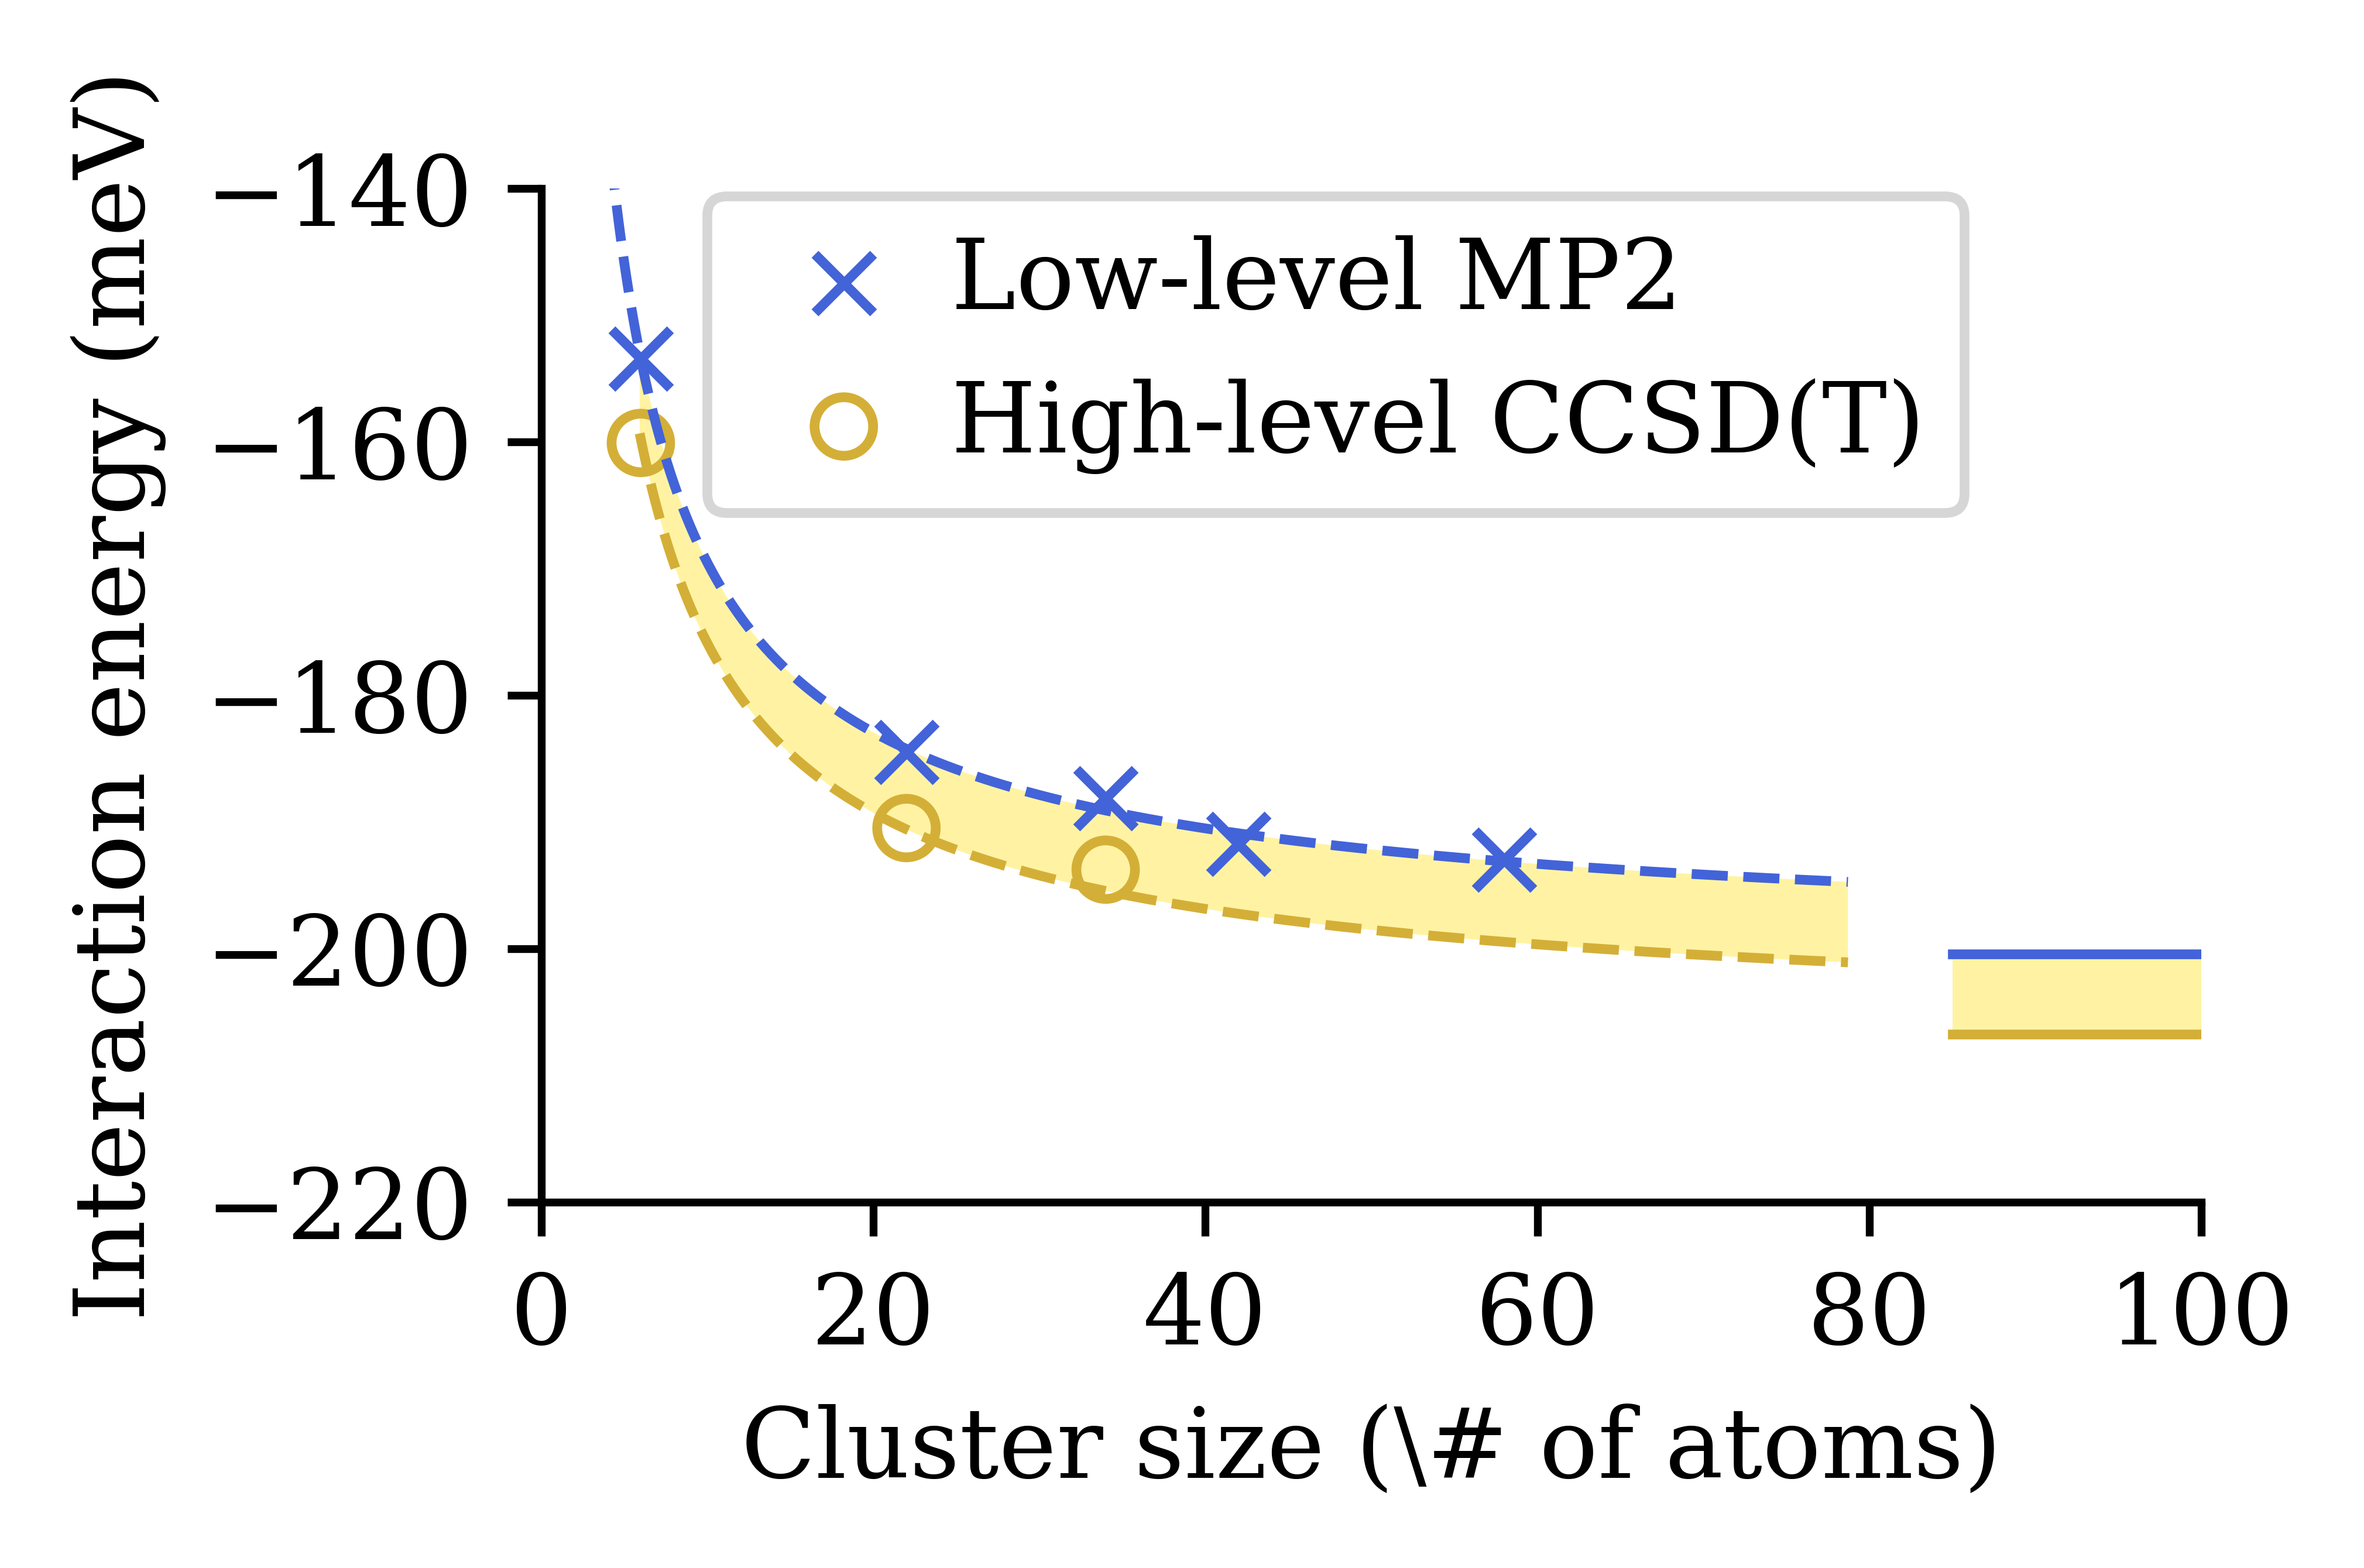

In [25]:
# Schematic of the SKZCAM protocol process

mp2_level = np.array(ene_list['MP2_TZQZ'])
atom_size_list = np.array([6, 22, 34, 42, 58, 82, 84, 100, 108])
cc_level = np.array(ene_list['LCCSDT_DZTZ'])

gamma_best = find_co_gamma(ene_list['MP2_TZQZ'])
slope, emp2_infty, r, p, se = linregress([1/(x**(gamma_best)) for x in tot_atom_list[:len(ene_list['MP2_TZQZ'])]],\
    [float(x) for x in ene_list['MP2_TZQZ']])

x = np.linspace(0,150,2000)
y = slope/(x**gamma_best) + emp2_infty


fig, axs = plt.subplots(figsize=(3.25,2),dpi=1200, constrained_layout=True)

for side in ['right','top']:
    axs.spines[side].set_visible(False)



# axs.set_xticks([])
# axs.set_yticks([])

cc_start = 79
cc_end = 1050

axs.fill_between(x[cc_start:cc_end], y[cc_start:cc_end],y[cc_start:cc_end] + ene_final['Cluster CCSD(T)']['DeltaCC'][0],color=color_dict['yellow'],edgecolor=None,alpha=0.4)
axs.plot(x[:cc_end],y[:cc_end],'--',linewidth=1,color=color_dict['blue'])
axs.plot(x[cc_start:cc_end],y[cc_start:cc_end] + ene_final['Cluster CCSD(T)']['DeltaCC'][0] ,'--',linewidth=1,color='#d4af37')

axs.scatter(atom_size_list[:len(mp2_level)], mp2_level, marker = 'x', linewidth=1,color=color_dict['blue'], label='Low-level MP2')
axs.scatter(atom_size_list[:len(cc_level)], cc_level[:len(cc_level)], marker = 'o', color='#d4af37',facecolors='none', linewidth=1,label='High-level CCSD(T)')

extra_spacing = 200

axs.plot([85,110],[emp2_infty,emp2_infty],'-',linewidth=1,color=color_dict['blue'])
axs.fill_between([85,110],[emp2_infty,emp2_infty],np.array([emp2_infty ,emp2_infty]) + ene_final['Cluster CCSD(T)']['DeltaCC'][0],color=color_dict['yellow'],edgecolor=None,alpha=0.4)

axs.plot([85,110],np.array([emp2_infty ,emp2_infty]) + ene_final['Cluster CCSD(T)']['DeltaCC'][0] ,'-',linewidth=1,color='#d4af37')


axs.legend(frameon=True,loc=(0.1,0.68),handletextpad=0.1)

if usetex == True:
    axs.set_ylabel(r'$E_\textrm{int}$ (meV)')
else:
    axs.set_ylabel(r'Interaction energy (meV)')

axs.set_xlabel(r'Cluster size (\# of atoms)')



axs.set_ylim([-220,-140])
axs.set_xlim([0,100])

plt.savefig('Figures/Fig_02.png')

<a id='tables7'></a>
## Table S7 - Final periodic CCSD(T), periodic DMC and cluster CCSD(T) $E_\textrm{ads}$ and their individual contributions

In [26]:
# Final values
df = pd.DataFrame(ene_final['Cluster CCSD(T)']).T

df.columns = ['Value','Error']
df['Value']['Cost'] = df['Value']['Cost']/1000
df['Error']['Cost'] = 0
df['Error']['RAM'] = 0
df = df.round().astype(int)
print('Cluster CCSD(T)')
print(df)
df1 = pd.DataFrame(ene_final['Periodic DMC']).T
df1.columns = ['Value','Error']
df1['Value']['Cost'] = df1['Value']['Cost']/1000
df1['Error']['Cost'] = 0
df1['Error']['RAM'] = 0
df1 = df1.round().astype(int)
print('Periodic DMC')
print(df1)
df2 = pd.DataFrame(ene_final['Periodic CCSD(T)']).T
df2.columns = ['Value','Error']
df2['Value']['Cost'] = 2*(80+6+2)
df2['Error']['Cost'] = 0
df2['Error']['RAM'] = 0

df2 = df2.round().astype(int)
print('Periodic DMC')

np.save('methods_eads.npy', ene_final) 
print(df2)


Cluster CCSD(T)
                Value  Error
Final            -198     11
EMP2_Bulklimit   -200      5
DeltaCC            -6      1
Delta_geom          8     10
Cost               25      0
RAM                40      0
Periodic DMC
                Value  Error
Final            -188     26
EDMC_2L          -159     14
DeltaDMC_2L-4L     -9     19
DeltaDMC_FSE      -33      5
DeltaLDA_IPFSE      5      0
Delta_geom          8     10
Cost             1079      0
RAM                 0      0
Periodic DMC
                Value  Error
Final            -193     24
ECCSD(T)_2L      -182     22
DeltaMP2_2L-4L     -6      0
DeltaMP2_core      -8      0
DeltaHF_IPFSE      -5      0
Delta_geom          8     10
Cost              176      0
RAM              3000      0


<a id='tables11'></a>
## Table S11 - Analysis of previous computational work on CO on MgO

In [27]:
# The effect of using different unconverged settings on the interaction energy
# Ideal interaction energy for the fifth rdf cluster.
print('Converged Eint for fifth cluster from SKZCAM protocol:              {0:.0f} meV'.format(ene_list['MP2_DZTZ'][4]))

# Effect of using a small basis set
print('Effect of smaller DZ basis set:                                     {0:.0f} meV <-- a weaker binding of {1:.0f} meV'.format(ene_list['MP2_DZ'][4],ene_list['MP2_DZ'][4] - ene_list['MP2_DZTZ'][4]))
print('Effect of smaller TZ basis set:                                     {0:.0f} meV <-- a weaker binding of {1:.0f} meV'.format(ene_list['MP2_TZ'][4],ene_list['MP2_TZ'][4] - ene_list['MP2_DZTZ'][4]))
print('Effect of smaller QZ basis set:                                     {0:.0f} meV <-- a weaker binding of {1:.0f} meV'.format(ene_list['MP2_QZ'][4],ene_list['MP2_QZ'][4] - ene_list['MP2_DZTZ'][4]))

# Large frozen core, which includes 2s and 2p electrons on the Mg atom
print('Effect of larger frozen core (i.e. 2s and 2p electrons on Mg atom): {0:.0f} meV <-- a weaker binding of {1:.0f} meV'.format(ene_list['MP2_DZTZ_lc'][4],ene_list['MP2_DZTZ_lc'][4] - ene_list['MP2_DZTZ'][4]))

# No BSSE correction
print('Effect of not using counterpoise corrections:                       {0:.0f} meV <-- a stronger binding of {1:.0f} meV'.format(ene_list['MP2_DZTZ_lc_NOCP'][4], np.abs(ene_list['MP2_DZTZ_lc_NOCP'][4] - ene_list['MP2_DZTZ'][4])))

# Computing energy at the smaller cluster level

ene_hf = []
ene_mp2 = []
for k in ['TZ','QZ']:
    ene_hf += [get_eads('Data/MP2_Convergence/{0}/{1}'.format(0,k), code_format='mrcc',typ='hf')*Hartree*1000]
    ene_mp2 += [get_eads('Data/MP2_Convergence/{0}/{1}'.format(0,k), code_format='mrcc',typ='lmp2_corr')*Hartree*1000]
dummy = extrapolate.get_cbs(ene_hf[0],ene_mp2[0],ene_hf[1],ene_mp2[1],X=3,Y=4,family='mixcc',output=False)
print('Effect of using a smaller 3x3x2 quantum cluster:                    {0:.0f} meV <-- a weaker binding of {1:.0f} meV'.format(dummy[-1],np.abs(ene_list['MP2_DZTZ'][4]  - dummy[-1] )))



Converged Eint for fifth cluster from SKZCAM protocol:              -196 meV
Effect of smaller DZ basis set:                                     -122 meV <-- a weaker binding of 74 meV
Effect of smaller TZ basis set:                                     -171 meV <-- a weaker binding of 25 meV
Effect of smaller QZ basis set:                                     -184 meV <-- a weaker binding of 12 meV
Effect of larger frozen core (i.e. 2s and 2p electrons on Mg atom): -165 meV <-- a weaker binding of 31 meV
Effect of not using counterpoise corrections:                       -294 meV <-- a stronger binding of 98 meV
Effect of using a smaller 3x3x2 quantum cluster:                    -184 meV <-- a weaker binding of 12 meV


In [28]:
# This dictionary indicates whether either of the 4 settings are converged. It is not considered converged if their chosen settings are not within 10 meV of the fully converged settings.
computational_work_convergence = {
    'Ugliengo et al.': {
        'Frozen core': 'No',
        'Basis set': 'Yes',
        'BSSE': 'Yes',
        'Cluster Size': 'No (Mg9O9)'
    },
    'Herschend et al.': {
        'Frozen core': 'No',
        'Basis set': 'No (TZ)',
        'BSSE': 'Yes',
        'Cluster Size': 'Yes (Mg18O18)' 
    },
    'Qin et al.': {
        'Frozen core': 'No',
        'Basis set': 'No (DZ)',
        'BSSE': 'Yes',
        'Cluster Size': 'No (Mg9O9)' 
    },
    'Staemmler': {
        'Frozen core': 'Yes',
        'Basis set': 'Yes',
        'BSSE': 'Yes',
        'Cluster Size': 'Yes'
    },
    'Boese et al.': {
        'Frozen core': 'Yes',
        'Basis set': 'Yes',
        'BSSE': 'Yes',
        'Cluster Size': 'Yes'
    },
    'Li et al.': {
        'Frozen core': 'N/A' ,
        'Basis set': 'No [6-311+G(2df)]',
        'BSSE': 'N/A',
        'Cluster Size': 'Yes' 
    },
    'Heuser et al.': {
        'Frozen core': 'N/A' ,
        'Basis set': 'No [TZ]',
        'BSSE': 'No',
        'Cluster Size': 'No (Mg9O9 without embedding)' 
    },
    'Mazheika and Levchenko': {
        'Frozen core': 'No' ,
        'Basis set': 'No [DZ and TZ]',
        'BSSE': 'Yes',
        'Cluster Size': 'No (Mg9O9 with electrostatic embedding)' 
    },
    'Alessio et al.': {
        'Frozen core': 'Yes',
        'Basis set': 'Yes',
        'BSSE': 'Yes',
        'Cluster Size': 'Yes'
    },
    'Mitra et al.': {
        'Frozen core': 'Yes',
        'Basis set': 'No (TZ)',
        'BSSE': 'No',
        'Cluster Size': 'Yes'
    }
}

df = pd.DataFrame(computational_work_convergence).T
df

,Frozen core,Basis set,BSSE,Cluster Size
Ugliengo et al.,No,Yes,Yes,No (Mg9O9)
Herschend et al.,No,No (TZ),Yes,Yes (Mg18O18)
Qin et al.,No,No (DZ),Yes,No (Mg9O9)
Staemmler,Yes,Yes,Yes,Yes
Boese et al.,Yes,Yes,Yes,Yes
Li et al.,N/A,No [6-311+G(2df)],N/A,Yes
Heuser et al.,N/A,No [TZ],No,No (Mg9O9 without embedding)
Mazheika and Levchenko,No,No [DZ and TZ],Yes,No (Mg9O9 with electrostatic embedding)
Alessio et al.,Yes,Yes,Yes,Yes
Mitra et al.,Yes,No (TZ),No,Yes


<a id='tables12'></a>
## Table S12 - Computation of zero-point energy and thermal contribution terms to convert $H_\textrm{ads}$ to $E_\textrm{ads}$

In [29]:
params = [61,1] # [ Temperature, degrees of freedom = 3N-5 ] Temperature given as average between studies by Dohnalek et al. and Wichtendahl et al.

thermal_ene_contributions = {y: {x:0 for x in dft_functionals} for y in ['ZPE','Eth','RT','Ecor']}

for i in dft_functionals:
    a,b = read_vib_freq('Data/DFT/Vib_Energy/{0}/AD_SLAB/OUTCAR'.format(i))
    c,d = read_vib_freq('Data/DFT/Vib_Energy/{0}/AD/OUTCAR'.format(i))

    ene_ad,eth_ad,zpe_ad,kT = get_quasi_rrho(a,b,params[0])
    ene_ad_slab,eth_ad_slab,zpe_ad_slab,kT = get_quasi_rrho(c,d,params[0])
    thermal_ene_contributions['ZPE'][i] = zpe_ad_slab - zpe_ad
    thermal_ene_contributions['Eth'][i] = eth_ad_slab - eth_ad
    thermal_ene_contributions['Ecor'][i] = ene_ad-ene_ad_slab + kT
    thermal_ene_contributions['RT'][i] = kT

df = pd.DataFrame(thermal_ene_contributions)
df = df.round().astype(int)
# df.to_clipboard(index=True, excel=True,sep=',')

f = open('thermal_corr.txt','w')
f.write('{0} Ecor\n'.format(np.average([thermal_ene_contributions['Ecor'][x] for x in thermal_ene_contributions['Ecor']])))
f.write('{0} ZPE\n'.format(np.average([thermal_ene_contributions['ZPE'][x] for x in thermal_ene_contributions['Ecor']])))
f.write('{0} Eth\n'.format(np.average([thermal_ene_contributions['Eth'][x] for x in thermal_ene_contributions['Ecor']])))
f.write('{0} RT'.format(np.average([thermal_ene_contributions['RT'][x] for x in thermal_ene_contributions['Ecor']])))
f.close()

thermal_correction = np.average([thermal_ene_contributions['Ecor'][x] for x in thermal_ene_contributions['Ecor']])
rt = np.average([thermal_ene_contributions['RT'][x] for x in thermal_ene_contributions['Ecor']])


df

,ZPE,Eth,RT,Ecor
01_PBE-D2-Ne,-31,6,5,30
02_revPBE-D4,-28,5,5,28
03_vdW-DF,-28,5,5,28
04_rev-vdW-DF2,-32,6,5,31
05_PBE0-D4,-30,5,5,30
06_B3LYP-D2-Ne,-29,5,5,29


<a id='fig3'></a>
## Figure 3 and S1 - Converting previous experiment $H_\textrm{ads}$ or $E_\textrm{act}$ (for TPD) to $E_\textrm{ads}$

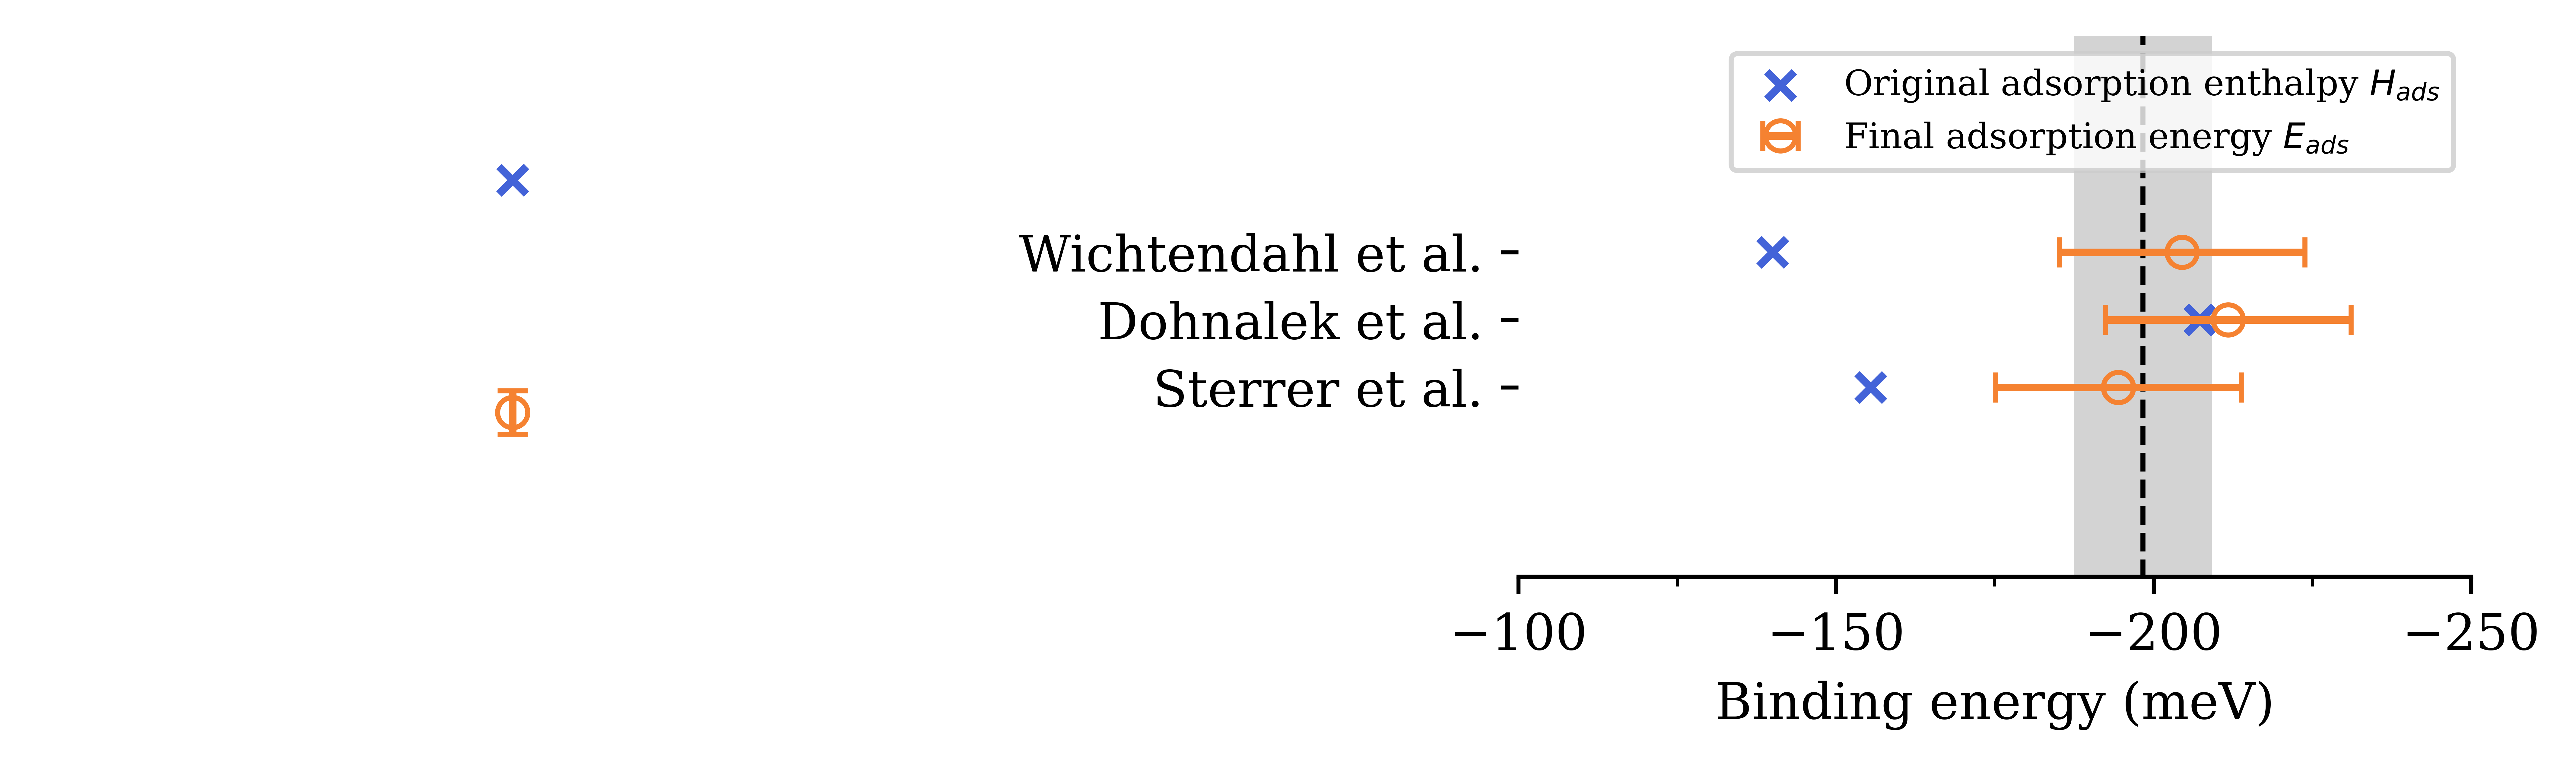

In [41]:
experimental_eact = {
    'Wichtendahl et al.': [-140,'Thermal programmed desorption',1999,'Eact, nu=13, low 0.3 ML coverage'],
    'Dohnalek et al.': [-20*kjmol_to_meV,'Thermal programmed desorption',2001,'Eact, nu=15, dilute limit extrapolation'],
    'Sterrer et al.': [-15*kjmol_to_meV,'Thermal programmed desorption',2006,'Eact, nu=13, high CO coverage']
}
experimental_eads = {
    'Wichtendahl et al.': [-16.9*kjmol_to_meV - thermal_correction,'Thermal programmed desorption',1999,'Campbell and Sellers, nu=13.8, low 0.3 ML coverage'],
    'Dohnalek et al.': [-17.6*kjmol_to_meV - thermal_correction,'Thermal programmed desorption',2001,'Campbell and Sellers, nu=13.8, low 0.3 ML coverage'],
    'Sterrer et al.': [-15*kjmol_to_meV - 0.8*2.3*rt - thermal_correction,'Thermal programmed desorption',2006,'nu=13.8 corrected, high CO coverage']
}


fig, axs = plt.subplots(1,2,figsize=(7,2),dpi=1200,constrained_layout=True)


axs[1].plot([ene_final['Cluster CCSD(T)']['Final'][0],ene_final['Cluster CCSD(T)']['Final'][0]],[1970,2025],'--',color='k',linewidth=1)
axs[1].fill_betweenx([1970,2025],[ene_final['Cluster CCSD(T)']['Final'][0] - ene_final['Cluster CCSD(T)']['Final'][1],ene_final['Cluster CCSD(T)']['Final'][0] - ene_final['Cluster CCSD(T)']['Final'][1]],[ene_final['Cluster CCSD(T)']['Final'][0] + ene_final['Cluster CCSD(T)']['Final'][1],ene_final['Cluster CCSD(T)']['Final'][0] + ene_final['Cluster CCSD(T)']['Final'][1]],color=color_dict['grey'],linewidth=1,edgecolor='none',alpha=0.5)

axs[1].scatter([experimental_eact['Wichtendahl et al.'][0],experimental_eact['Dohnalek et al.'][0],experimental_eact['Sterrer et al.'][0]],[1998,2000.5,2003],s=30, color=color_dict['blue'], marker='x',label=r'Original adsorption enthalpy $H_{ads}$')
# axs.scatter([experimental_eads['Wichtendahl et al.'][0],experimental_eads['Dohnalek et al.'][0],experimental_eads['Sterrer et al.'][0]],[1998,2000.5,2003],s=30, color=color_dict['orange'], facecolor='none',label=r'Adsorption energy $E_\textrm{ads}$') 
axs[1].errorbar([experimental_eads['Wichtendahl et al.'][0],experimental_eads['Dohnalek et al.'][0],experimental_eads['Sterrer et al.'][0]],[1998,2000.5,2003],xerr=1.6*2.3*rt,fmt='o',markersize=6,capsize=3,color=color_dict['orange'],markerfacecolor='none',label=r'Final adsorption energy $E_{ads}$')



axs[1].set_xlabel(r'Binding energy (meV)')

axs[1].spines['left'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['top']. set_visible(False)

axs[1].set_ylim([2004.5,1997])
axs[1].set_xlim([-100,-250])


axs[1].xaxis.set_major_locator(MultipleLocator(50))
axs[1].xaxis.set_minor_locator(MultipleLocator(25))

axs[1].set_yticks([1998,2000.5,2003])
axs[1].set_yticklabels([r'Wichtendahl et al.','Dohnalek et al.', 'Sterrer et al.'])



axs[0].spines['left'].set_visible(False)
axs[0].spines['bottom']. set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['top']. set_visible(False)
axs[0].set_xticks([])
axs[0].set_yticks([])


axs[0].scatter([1998],[experimental_eact['Wichtendahl et al.'][0]],s=30, color=color_dict['blue'], marker='x')
axs[0].errorbar([1998],[experimental_eads['Wichtendahl et al.'][0]],yerr=6,fmt='o',markersize=6,capsize=3,color=color_dict['orange'],markerfacecolor='none')
axs[0].set_ylim([-250,-100])

if usetex == False:
    axs[1].set_ylim([2010,1990])
    axs[1].legend(fontsize=7)

plt.savefig('Figures/Fig_03.png')


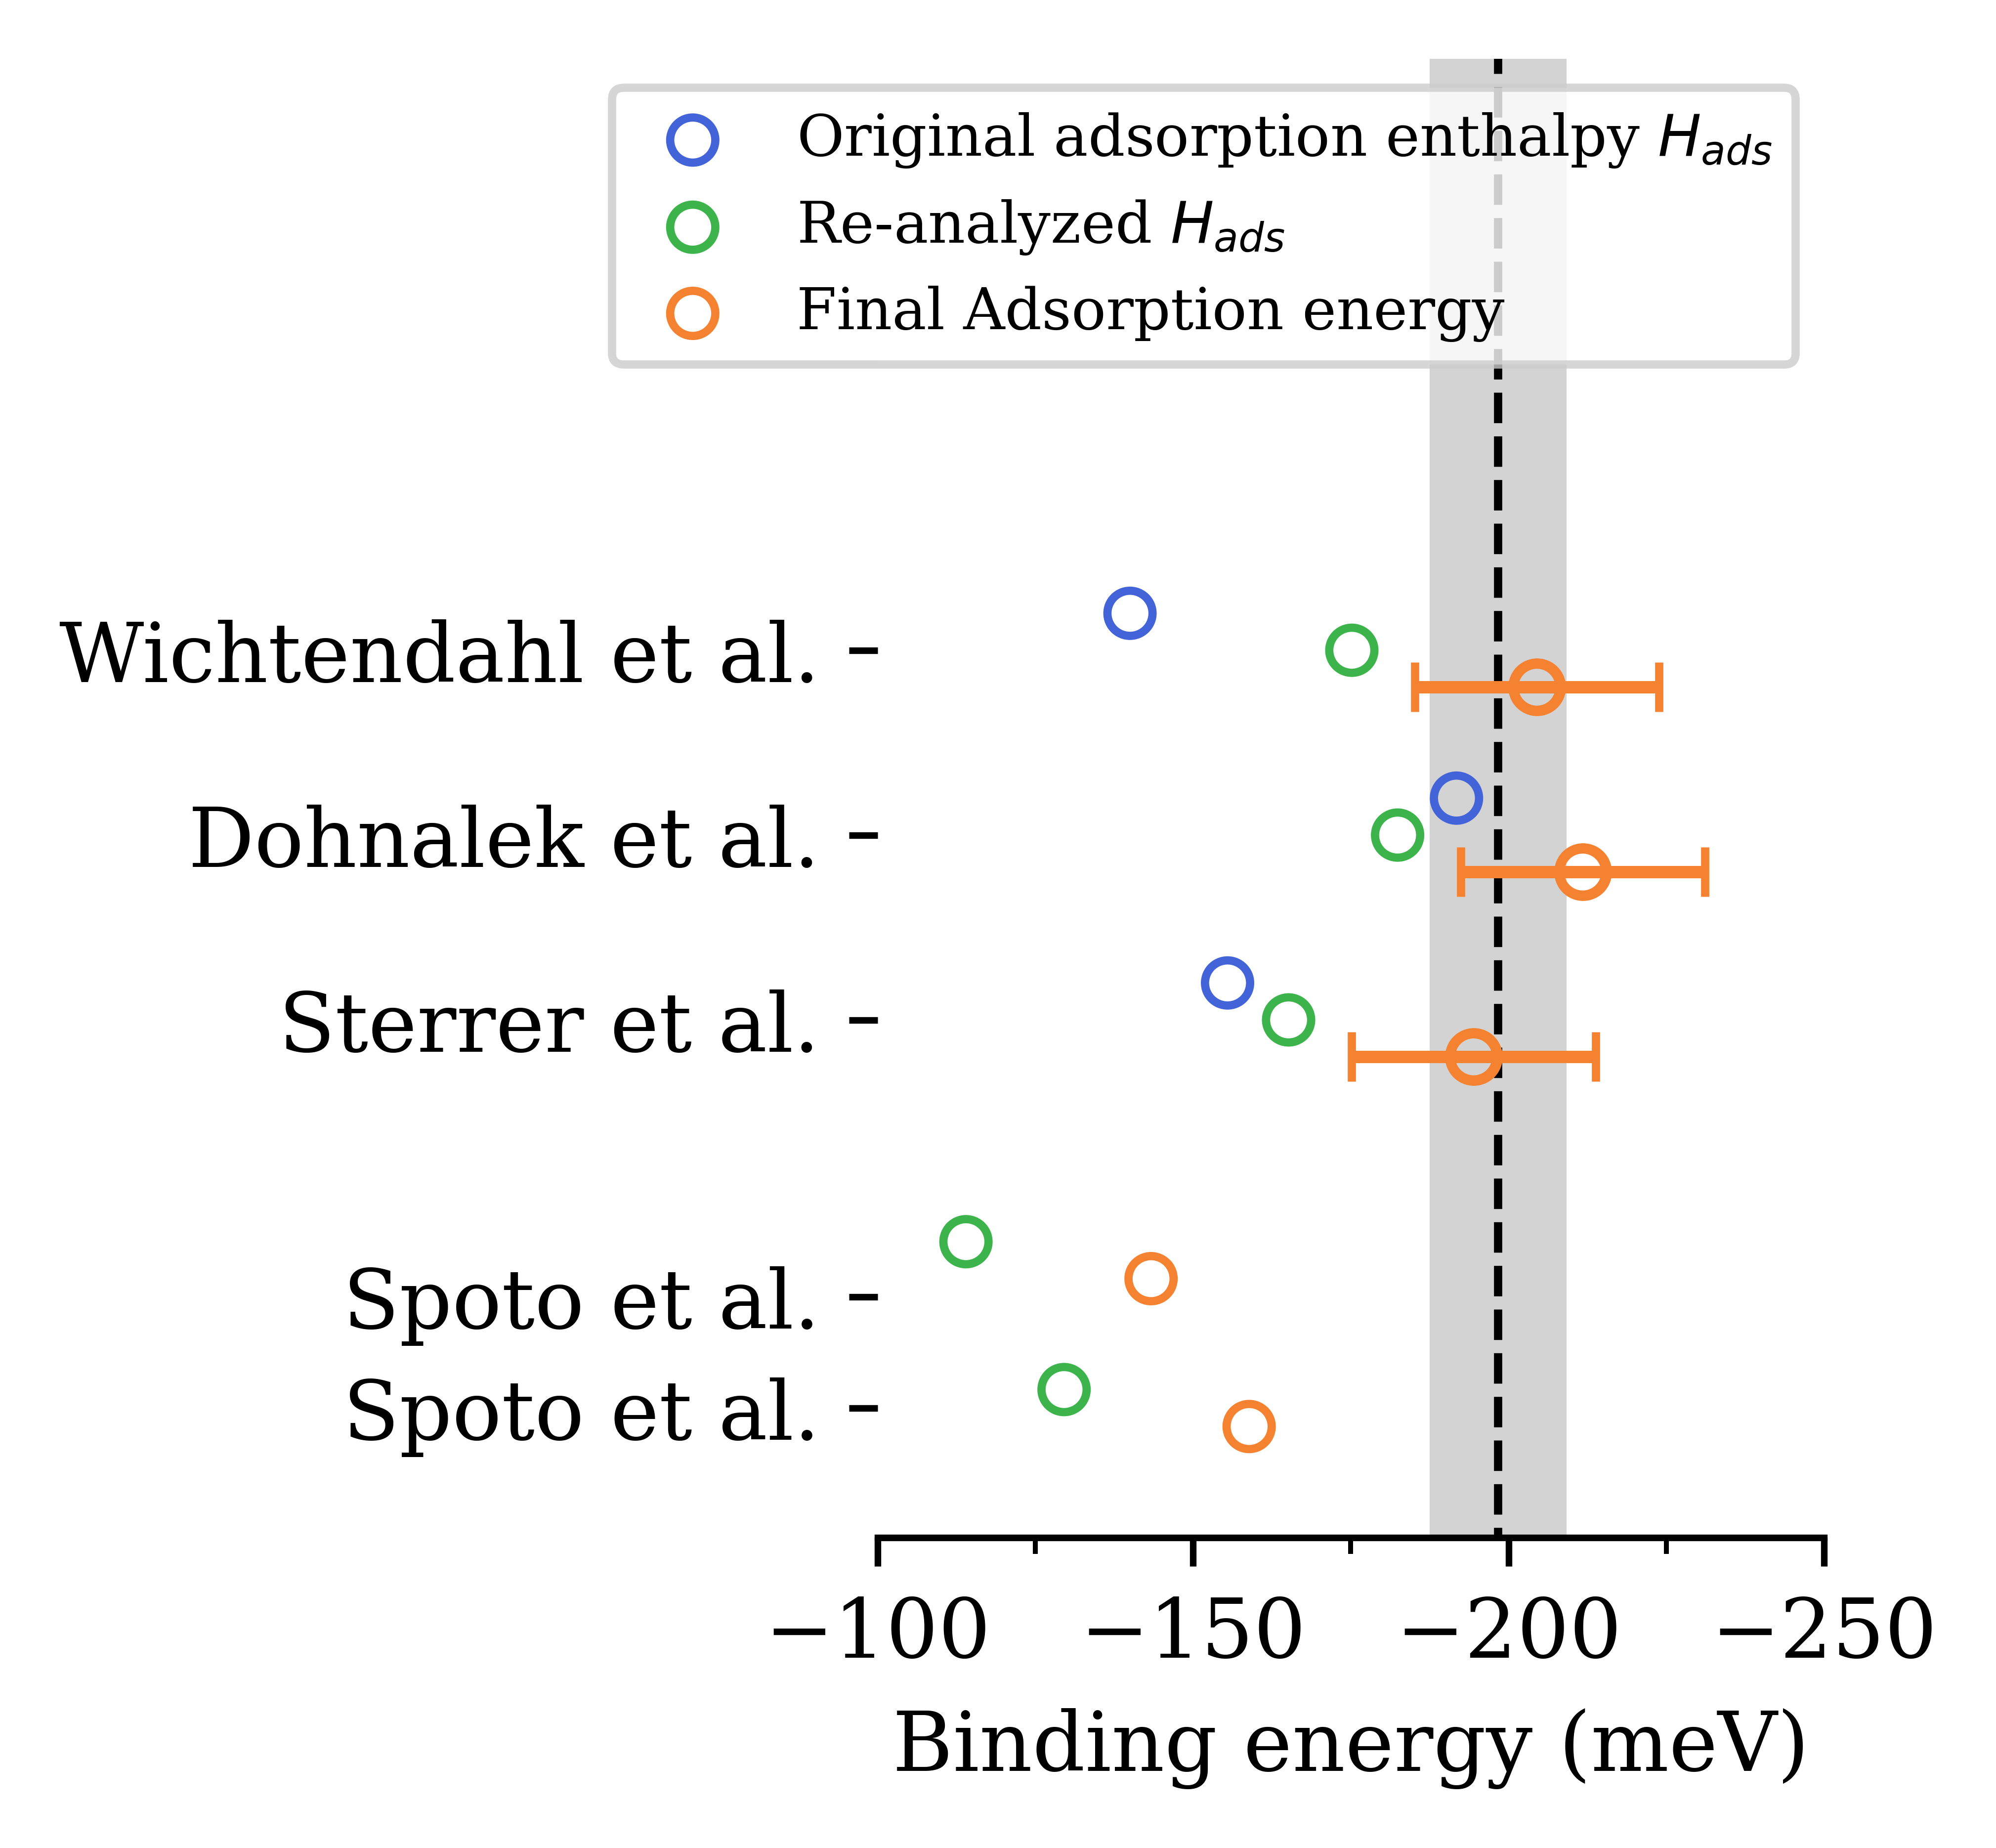

In [37]:
experimental_eact = {
    'Wichtendahl et al.': [-140,'Thermal programmed desorption',1999,'Eact, nu=13, low 0.3 ML coverage'],
    'Dohnalek et al.': [-18.5*kjmol_to_meV,'Thermal programmed desorption',2001,'Eact, nu=15, low 0.125 ML coverage'],
    'Sterrer et al.': [-15*kjmol_to_meV,'Thermal programmed desorption',2006,'Eact, nu=13, high CO coverage']
}
experimental_hads = {
    'Wichtendahl et al.': [-16.9*kjmol_to_meV,'Thermal programmed desorption',1999,'Campbell and Sellers, nu=13.8, low 0.3 ML coverage'],
    'Dohnalek et al.': [-17.6*kjmol_to_meV,'Thermal programmed desorption',2001,'Campbell and Sellers, nu=13.8, low 0.3 ML coverage'],
    'Spoto et al.1': [-11*kjmol_to_meV,'FTIR spectroscopy',2003,'MgO smoke'],
    'Spoto et al.2': [-12.5*kjmol_to_meV,'FTIR spectroscopy',2004,'MgO smoke'],
    'Sterrer et al.': [-15*kjmol_to_meV - 0.8*2.3*rt,'Thermal programmed desorption',2006,'nu=13.8 corrected, high CO coverage']
}
experimental_eads = {
    'Wichtendahl et al.': [-16.9*kjmol_to_meV - thermal_correction,'Thermal programmed desorption',1999,'Campbell and Sellers, nu=13.8, low 0.3 ML coverage'],
    'Dohnalek et al.': [-17.6*kjmol_to_meV - thermal_correction,'Thermal programmed desorption',2001,'Campbell and Sellers, nu=13.8, low 0.3 ML coverage'],
    'Spoto et al.1': [-11*kjmol_to_meV - thermal_correction,'FTIR spectroscopy',2003,'MgO smoke'],
    'Spoto et al.2': [-12.5*kjmol_to_meV - thermal_correction,'FTIR spectroscopy',2004,'MgO smoke'],
    'Sterrer et al.': [-15*kjmol_to_meV - 0.8*2.3*rt - thermal_correction,'Thermal programmed desorption',2006,'nu=13.8 corrected, high CO coverage']
}



fig, axs = plt.subplots(figsize=(3.25,3),dpi=1200, sharey=True,constrained_layout=True)

# The SKZCAM CCSD(T) reference number
axs.plot([ene_final['Cluster CCSD(T)']['Final'][0],ene_final['Cluster CCSD(T)']['Final'][0]],[1970,2025],'--',color='k',linewidth=1)
axs.fill_betweenx([1970,2025],[ene_final['Cluster CCSD(T)']['Final'][0] - ene_final['Cluster CCSD(T)']['Final'][1],ene_final['Cluster CCSD(T)']['Final'][0] - ene_final['Cluster CCSD(T)']['Final'][1]],[ene_final['Cluster CCSD(T)']['Final'][0] + ene_final['Cluster CCSD(T)']['Final'][1],ene_final['Cluster CCSD(T)']['Final'][0] + ene_final['Cluster CCSD(T)']['Final'][1]],color=color_dict['grey'],linewidth=1,edgecolor='none',alpha=0.5)

axs.scatter([experimental_eact['Wichtendahl et al.'][0],experimental_eact['Dohnalek et al.'][0],experimental_eact['Sterrer et al.'][0]],[1997.5,2000,2002.5],s=30, color=color_dict['blue'], facecolor='none',label=r'Original adsorption enthalpy $H_{ads}$')
axs.scatter([experimental_hads['Wichtendahl et al.'][0],experimental_hads['Dohnalek et al.'][0],experimental_hads['Sterrer et al.'][0]],[1998,2000.5,2003],s=30, color=color_dict['green'], facecolor='none',label=r'Re-analyzed $H_{ads}$') 
axs.scatter([experimental_eads['Wichtendahl et al.'][0],experimental_eads['Dohnalek et al.'][0],experimental_eads['Sterrer et al.'][0]],[1998.5,2001,2003.5],s=30, color=color_dict['orange'], facecolor='none',label=r'Final Adsorption energy') 
axs.errorbar([experimental_eads['Wichtendahl et al.'][0],experimental_eads['Dohnalek et al.'][0],experimental_eads['Sterrer et al.'][0]],[1998.5,2001,2003.5],xerr=1.6*2.3*rt,fmt='o',markersize=6,capsize=3,color=color_dict['orange'],markerfacecolor='none')



axs.scatter([experimental_hads['Spoto et al.1'][0],experimental_hads['Spoto et al.2'][0]],[2006,2008],s=30, color=color_dict['green'], facecolor='none')
axs.scatter([experimental_eads['Spoto et al.1'][0],experimental_eads['Spoto et al.2'][0]],[2006.5,2008.5],s=30, color=color_dict['orange'], facecolor='none')

axs.set_xlabel(r'Binding energy (meV)')

axs.spines['left'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['top']. set_visible(False)

axs.set_ylim([2010,1995])
axs.set_xlim([-100,-250])

if usetex == False:
    axs.set_ylim([2010,1990])
    axs.legend(fontsize=7)


axs.xaxis.set_major_locator(MultipleLocator(50))
axs.xaxis.set_minor_locator(MultipleLocator(25))

axs.set_yticks([1998,2000.5,2003,2006.75,2008.25])
axs.set_yticklabels([r'Wichtendahl et al.','Dohnalek et al.','Sterrer et al.','Spoto et al.','Spoto et al.',])


plt.savefig('Figures/Fig_S1.png')

In [42]:
# Effects of layer convergence and other factors on the adsorption energy

eads_dft_coverage_conv = {
    '0.125': {
        # 'Supercell Size': '4x4' ,
        'CO coverage': '0.250' ,
        'Eads': 0,
        'Diff': 0
    },
    '0.250': {
        # 'Supercell Size': '2x2' ,
        'CO coverage': '0.125' ,
        'Eads': 0,
        'Diff': 0
    },
}

for i in ['0.125','0.250']:
    ad_slab = find_energy('Data/DFT/Convergence/Coverage/{0}/AD_SLAB/OUTCAR'.format(i),code_format='vasp')
    ad =  find_energy('Data/DFT/Convergence/Coverage/{0}/AD/OUTCAR'.format(i),code_format='vasp')
    slab = find_energy('Data/DFT/Convergence/Coverage/{0}/SLAB/OUTCAR'.format(i),code_format='vasp')


    print(ad_slab,slab,ad)
    eads = (ad_slab-ad-slab)*1000
    if i == '0.125':
        eads0 = eads
    
    eads_dft_coverage_conv[i]['Eads'] = eads
    eads_dft_coverage_conv[i]['Diff'] = (eads - eads0)

df = pd.DataFrame(eads_dft_coverage_conv).T
df['Eads'] = df['Eads'].apply(lambda x: round(x))
df['Diff'] = df['Diff'].apply(lambda x: round(x))
# df.to_clipboard( index=False, excel=True,sep=',')
df

-277.39883509 -264.83597459 -12.29721443
-144.97814534 -132.41591186 -12.29721443


,CO coverage,Eads,Diff
0.125,0.250,-266,0
0.250,0.125,-265,1
